# ***Healthcare: Predicting Heart Disease Risk***

***Background:*** <br>
Heart disease remains one of the leading causes of death globally. Early detection using patient health indicators can significantly improve prevention and treatment outcomes. A hospital wants to develop a predictive system that can identify individuals at high risk of heart disease based on non-invasive medical data.

***Problem Statement:*** <br>
Perform exploratory data analysis (EDA) to uncover the key factors influencing heart disease. <br>Build a classification model that predicts whether a patient is likely to have heart disease using features such as age, cholesterol level, resting blood pressure, maximum heart rate, and chest pain type.

***Dataset:*** <br>
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


## **Required Libraries**

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import essential data manipulation libraries
import pandas as pd
import numpy as np

# Import essential data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import essential statistics libraries
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# Import essential modeling libraries
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, learning_curve,  GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, 
                            precision_score, 
                            recall_score, 
                            f1_score, 
                            roc_auc_score, 
                            confusion_matrix, 
                            classification_report, 
                            RocCurveDisplay)


# Set visualization style
sns.set(style="darkgrid", palette="pastel")

#### **Library Group Overview**

##### **Data Manipulation**

Used for loading, cleaning, and organizing data.
Libraries like **Pandas** and **NumPy** handle structured datasets, perform numerical operations, and prepare data for analysis.

---

##### **Data Visualization**

Used to explore and present data patterns clearly.
Libraries like **Matplotlib** and **Seaborn** create charts and plots that help reveal trends, distributions, and relationships in the data.

---

##### **Statistics**

Used to test relationships and validate findings mathematically.
Libraries from **SciPy** perform statistical tests like Chi-square and t-tests to confirm feature significance and data reliability.

---

##### **Data Modeling**

Used to build, train, and evaluate predictive machine learning models.
Libraries from **Scikit-learn** and **XGBoost** handle feature selection, model training, tuning, scaling, and performance evaluation.

---


## **Part 1: Data Cleaning and Preprocessing**

Before performing exploratory data analysis (EDA) or model building, it’s important to ensure that the dataset is clean and consistent. This ensures data quality, consistency, and readiness for both visualization and machine learning modeling.

In this step, we’ll:
- Inspect the dataset for basic structure and missing values, helping us spot potential inconsistencies early.
- Rename columns for clarity and consistency. 
- Handle missing or invalid data points (if any).  
- Confirm correct data types.
- Check for duplicates.
- Prepare a clean, analysis-ready version of the dataset.


### ***Step 1: Load the Dataset***

We load the dataset and inspect the first few rows to understand its structure, feature names, and general data layout.

In [7]:
# Load dataset into Pandas DataFrame
df = pd.read_csv(r"C:\Users\Ibifu\Documents\GitHub\data\heart.csv")

# Display first five rows in the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### ***Feature Descriptions:***

| Feature      | Meaning                                            | Type                  | Encoded Values / Explanation                                                          |
| ------------ | -------------------------------------------------- | --------------------- | ------------------------------------------------------------------------------------- |
| **age**      | Age in years                                       | Numerical             | N/A                                                                                     |
| **sex**      | Gender                                             | Categorical           | 0 = Female, 1 = Male                                                                  |
| **cp**       | Chest pain type                                    | Categorical           | 0 = Typical angina<br>1 = Atypical angina<br>2 = Non-anginal pain<br>3 = Asymptomatic |
| **trestbps** | Resting blood pressure (mm Hg)                     | Numerical             | N/A                                                                                    |
| **chol**     | Serum cholesterol (mg/dl)                          | Numerical             | N/A                                                                                    |
| **fbs**      | Fasting blood sugar > 120 mg/dl                    | Categorical           | 0 = False, 1 = True                                                                   |
| **restecg**  | Resting electrocardiographic results               | Categorical           | 0 = Normal<br>1 = ST-T wave abnormality<br>2 = Left ventricular hypertrophy           |
| **thalach**  | Maximum heart rate achieved                        | Numerical             | N/A                                                                                     |
| **exang**    | Exercise induced angina                            | Categorical           | 0 = No, 1 = Yes                                                                       |
| **oldpeak**  | ST depression induced by exercise relative to rest | Numerical             | N/A                                                                                     |
| **slope**    | Slope of the peak exercise ST segment              | Categorical           | 0 = Upsloping<br>1 = Flat<br>2 = Downsloping                                          |
| **ca**       | Number of major vessels colored by fluoroscopy     | Categorical (ordinal) | 0–4 (higher = more severe)                                                            |
| **thal**     | Thalassemia test result                            | Categorical           | 0 = Normal<br>1 = Fixed defect<br>2 = Reversible defect<br>3 = Unknown                               |
| **target**   | Heart disease presence                             | Binary                | 0 = No disease, 1 = Disease                                                           |


The dataset provided for this case study is already encoded, meaning that categorical features (like gender, chest pain type, and thalassemia results) have been converted into numerical values.<br>This encoding is essential for machine learning algorithms but makes the dataset less interpretable and appealing during exploratory data analysis (EDA) .

To maintain both readability and model compatibility:

We’ll use `df` as the main numeric dataset for modeling.

We’ll create `df_eda`, a human-readable version for EDA and visualization (where encoded categories are converted back to descriptive labels).

### ***Step 2: Rename Columns for Readability***

Renaming improves readability, visualization, and documentation clarity.
Well-named columns make it easier for collaborators and readers to interpret the analysis.

In [11]:
# Display a list of column names in the DataFrame
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [12]:
# Rename columns for clarity and consistency
df.columns = ["age", 
              "gender", 
              "chest_pain_type", 
              "resting_blood_pressure", 
              "cholesterol_measure", 
              "fasting_blood_sugar", 
              "resting_ecg_result", 
              "max_heart_rate", 
              "exercise_induced_angina", 
              "st_depression", 
              "st_slope", 
              "major_vessels_count", 
              "thal_status", 
              "heart_disease"]

# Verify the new column names
df.head()

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol_measure,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels_count,thal_status,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### ***Step 3: Dataset Overview***

This step confirms the dataset’s dimensions, total features, and the completeness of each column.

In [14]:
# Check the number of rows and columns in the DataFrame
df.shape

(1025, 14)

The DataFrame has 1025 rows and 14 columns

In [16]:
# Display a quick summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1025 non-null   int64  
 1   gender                   1025 non-null   int64  
 2   chest_pain_type          1025 non-null   int64  
 3   resting_blood_pressure   1025 non-null   int64  
 4   cholesterol_measure      1025 non-null   int64  
 5   fasting_blood_sugar      1025 non-null   int64  
 6   resting_ecg_result       1025 non-null   int64  
 7   max_heart_rate           1025 non-null   int64  
 8   exercise_induced_angina  1025 non-null   int64  
 9   st_depression            1025 non-null   float64
 10  st_slope                 1025 non-null   int64  
 11  major_vessels_count      1025 non-null   int64  
 12  thal_status              1025 non-null   int64  
 13  heart_disease            1025 non-null   int64  
dtypes: float64(1), int64(13)

> All columns have 1,025 non-null entries, which means there are no missing values. The data types are ‘int’ because the data has been encoded; a great sign that our dataset is clean and well-structured.

### ***Step 4: Check for Missing Values***

Missing data can impact model performance and bias results.
If any were found, we’d decide to impute (fill) or drop them.

In [19]:
# Check number of missing values in each column
df.isna().sum()

age                        0
gender                     0
chest_pain_type            0
resting_blood_pressure     0
cholesterol_measure        0
fasting_blood_sugar        0
resting_ecg_result         0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
major_vessels_count        0
thal_status                0
heart_disease              0
dtype: int64

>No missing values are present, so no imputation or deletion is needed.

### ***Step 5: Handling Duplicates***

Duplicate records can mislead statistical summaries and bias machine learning models.
We check and remove them to ensure data integrity (accuracy and completeness).

In [22]:
# Check for duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()

print(f"The DataFrame has {duplicate_count} duplicated rows.")

The DataFrame has 723 duplicated rows.


In [23]:
# Display first 30 duplicate rows for manual inspection
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(30)

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol_measure,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels_count,thal_status,heart_disease
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
779,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
143,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
201,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1


>The above block of code identifies and displays all duplicate rows to ensure data integrity. Some observations appear more than three times.<br> Since there are no unique patient IDs or timestamps to justify repeated entries, any duplicates or triplicates, are considered unintentional. Removing them prevents bias in analysis and ensures fair, accurate model results.

In [25]:
# Remove all duplicate rows to ensure each record is unique
df = df.drop_duplicates()

# Confirm that duplicates have been removed
print(f"Remaining rows after dropping duplicates: {df.shape[0]}")

Remaining rows after dropping duplicates: 302


>A total of 723 duplicate rows were identified and removed, leaving 302 unique rows. This ensures data integrity and prevents redundancy during model training.

In [27]:
# Recheck dataset summary to ensure data integrity(accuracy and completeness)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   gender                   302 non-null    int64  
 2   chest_pain_type          302 non-null    int64  
 3   resting_blood_pressure   302 non-null    int64  
 4   cholesterol_measure      302 non-null    int64  
 5   fasting_blood_sugar      302 non-null    int64  
 6   resting_ecg_result       302 non-null    int64  
 7   max_heart_rate           302 non-null    int64  
 8   exercise_induced_angina  302 non-null    int64  
 9   st_depression            302 non-null    float64
 10  st_slope                 302 non-null    int64  
 11  major_vessels_count      302 non-null    int64  
 12  thal_status              302 non-null    int64  
 13  heart_disease            302 non-null    int64  
dtypes: float64(1), int64(13)
memory

### ***Step 6: Inspect Unique Values per Feature***

This helps distinguish categorical from continuous variables.<br>
Features with limited unique values (like gender, chest_pain_type, or st_slope) are categorical, even though they’re represented as numbers.

In [29]:
# Check number of unique values in each column
df.nunique()

age                         41
gender                       2
chest_pain_type              4
resting_blood_pressure      49
cholesterol_measure        152
fasting_blood_sugar          2
resting_ecg_result           3
max_heart_rate              91
exercise_induced_angina      2
st_depression               40
st_slope                     3
major_vessels_count          5
thal_status                  4
heart_disease                2
dtype: int64

### ***Step 7: Generate Summary Statistics of Numerical Features***

Descriptive statistics provide insight into the central tendency and distribution of numeric features, helping identify outliers or irregularities.

In [31]:
# Generate summary stats for numerical columns
df[['age', 'resting_blood_pressure', 'cholesterol_measure', 'max_heart_rate', "st_depression"]].describe()

,age,resting_blood_pressure,cholesterol_measure,max_heart_rate,st_depression
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


>For categorical features (like gender, and chest_pain_type), the statistics such as mean and standard deviation don’t have meaningful interpretations. They simply represent the numerical codes assigned to each category.

### ***Step 8: Check for Inconsistent or Impossible Values in Numerical Features*** 

Sometimes datasets have values that are technically valid types but unrealistic medically (e.g., cholesterol = 0 or negative values, age = 0 or negative values, maximum_heart_rate = 0 or negative values). <br>In medical datasets, it’s essential to confirm that numerical features such as age, blood pressure, cholesterol, and heart rate fall within realistic human ranges. This step ensures that our data reflects valid patient information and helps prevent misleading model predictions.

In [35]:
# Define realistic medical ranges for each feature
ranges = {
    'age': (0, 120),  # human age in years
    'resting_blood_pressure': (50, 250),  # mmHg
    'cholesterol_measure': (100, 600),  # mg/dl
    'max_heart_rate': (50, 250),  # bpm
    'st_depression': (0, 10)  # typical range of ST depression in ECG readings
}

# Check for out-of-range or impossible values
for col, (min_val, max_val) in ranges.items():
    invalid = df[(df[col] < min_val) | (df[col] > max_val)]
    print(f"\n {col.upper()}:")
    if not invalid.empty:
        print(f"Found {len(invalid)} out-of-range values:")
        display(invalid[[col]])
    else:
        print("All values are within realistic medical range")


 AGE:
All values are within realistic medical range

 RESTING_BLOOD_PRESSURE:
All values are within realistic medical range

 CHOLESTEROL_MEASURE:
All values are within realistic medical range

 MAX_HEART_RATE:
All values are within realistic medical range

 ST_DEPRESSION:
All values are within realistic medical range


### ***Step 9: Create a Readable Copy for EDA (Categorical Conversion)***

Since ***"df"*** will remain numeric for machine learning, we’ll make a copy ***"df_eda"*** to convert encoded categorical values into meaningful text for easier visualization and interpretation.

In [37]:
# Create a readable copy of the dataset for EDA and documentation 
df_eda = df.copy()

df_eda.head()

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol_measure,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels_count,thal_status,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### ***Step 10: Convert Encoded Categories to Descriptive Labels***

This step converts the encoded values into descriptive text, making visualizations (bar charts, countplots, etc.) easier to interpret.<br>
It’s purely for presentation and EDA: the numeric encoding in "df" remains unchanged for modeling.

In [39]:
# Mapping of encoded categorical features to readable labels
categorical_cols = {
    "gender": {0: "female", 1: "male"},
    "chest_pain_type": {
        0: "typical angina", 
        1: "atypical angina", 
        2: "non-anginal pain", 
        3: "asymptomatic"
    },
    "fasting_blood_sugar": {0: "False", 1: "True"},
    "resting_ecg_result": {
        0: "normal", 
        1: "ST-T abnormality", 
        2: "LV hypertrophy"
    },
    "exercise_induced_angina": {0: "no", 1: "yes"},
    "st_slope": {
        0: "upsloping", 
        1: "flat", 
        2: "downsloping"
    },
    "thal_status": {
        0: "normal", 
        1: "fixed defect", 
        2: "reversible defect", 
        3: "unknown"
    },
    "heart_disease": {0: "no disease", 1: "disease"}
}

# Apply mapping to EDA copy
for col, labels in categorical_cols.items():
    if col in df_eda.columns:
        df_eda[col] = df_eda[col].map(labels)

In [40]:
# Display first few rows of the readable DataFrame
df_eda.head()

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol_measure,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels_count,thal_status,heart_disease
0,52,male,typical angina,125,212,False,ST-T abnormality,168,no,1.0,downsloping,2,unknown,no disease
1,53,male,typical angina,140,203,True,normal,155,yes,3.1,upsloping,0,unknown,no disease
2,70,male,typical angina,145,174,False,ST-T abnormality,125,yes,2.6,upsloping,0,unknown,no disease
3,61,male,typical angina,148,203,False,ST-T abnormality,161,no,0.0,downsloping,1,unknown,no disease
4,62,female,typical angina,138,294,True,ST-T abnormality,106,no,1.9,flat,3,reversible defect,no disease


In [41]:
# Display a quick summary of the EDA DataFrame
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   gender                   302 non-null    object 
 2   chest_pain_type          302 non-null    object 
 3   resting_blood_pressure   302 non-null    int64  
 4   cholesterol_measure      302 non-null    int64  
 5   fasting_blood_sugar      302 non-null    object 
 6   resting_ecg_result       302 non-null    object 
 7   max_heart_rate           302 non-null    int64  
 8   exercise_induced_angina  302 non-null    object 
 9   st_depression            302 non-null    float64
 10  st_slope                 302 non-null    object 
 11  major_vessels_count      302 non-null    int64  
 12  thal_status              302 non-null    object 
 13  heart_disease            302 non-null    object 
dtypes: float64(1), int64(5), object

>After mapping, each of those (categorical) columns becomes a string (object) type in pandas, not numerical anymore.

In [43]:
# Confirm that the numeric-encoded version is unchanged
df.head()

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol_measure,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels_count,thal_status,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### ***Step 11: Final Data Validation***

In [45]:
print("Main/Model DataFrame(df) Shape:", df.shape)
print("\n")
print("EDA DataFrame(df_eda) Shape:", df_eda.shape)

Main/Model DataFrame(df) Shape: (302, 14)


EDA DataFrame(df_eda) Shape: (302, 14)


> Now we have the same number of rows and columns in both the main model DataFrame `df` and the Exploratory Data Analysis DataFrame `df_eda`

### ***Step 12: Save Cleaned Versions***

In [48]:
# Clean version of model DataFrame
df.to_csv("heart_model.csv", index=False)

# Clean version of EDA DataFrame
df_eda.to_csv("heart_eda.csv", index=False)

### ***Summary: Data Cleaning Process***

* The dataset was already encoded, meaning categorical features were numerically represented for ML readiness.

* No missing records were found.

* All features were renamed for readability and clarity.

* All duplicate rows were removed to ensure that each record represents a unique patient observation, preventing bias in analysis and model training.

* Checked for inconsistent or impossible values, such as zero cholesterol or unrealistic blood pressure readings, to ensure clinical plausibility. 

* A readable version `df_eda` was created for EDA, while the encoded version `df` was preserved for model training.

>After cleaning, the dataset is free of duplicates and missing data, has clear feature names, and includes two well-prepared versions: one optimized for EDA and the other ready for machine learning modeling.

---------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------

## **Part 2: Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is a crucial step in a data science project where the dataset is examined and visualized to understand its structure, detect patterns, and uncover insights that guide model development.

EDA typically involves two main components:

* Descriptive Exploration (Non-Visual):
Summarizing data with statistics such as mean, median, value counts, and correlations to understand distributions and relationships.

* Visual Exploration (Graphical EDA):
Using plots like histograms, boxplots, bar charts, and heatmaps to identify trends, patterns, and potential predictors in an intuitive way.

In this case study, the key objectives of EDA are to:

- Understand the data distribution and how health indicators such as age, cholesterol, and blood pressure vary.
- Compare patterns between patients with and without heart disease to identify significant group differences.
- Detect relationships among variables, such as the interaction between age, maximum heart rate, and chest pain type.
- Identify potential outliers or inconsistencies that might bias model training.
- Generate insights for feature selection to determine the most relevant attributes for predicting heart disease.

In [53]:
# Display first five rows in "df_eda" DataFrame
df_eda.head()

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol_measure,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels_count,thal_status,heart_disease
0,52,male,typical angina,125,212,False,ST-T abnormality,168,no,1.0,downsloping,2,unknown,no disease
1,53,male,typical angina,140,203,True,normal,155,yes,3.1,upsloping,0,unknown,no disease
2,70,male,typical angina,145,174,False,ST-T abnormality,125,yes,2.6,upsloping,0,unknown,no disease
3,61,male,typical angina,148,203,False,ST-T abnormality,161,no,0.0,downsloping,1,unknown,no disease
4,62,female,typical angina,138,294,True,ST-T abnormality,106,no,1.9,flat,3,reversible defect,no disease


### ***Step 1: Univariate Analysis - Individual Feature Exploration***

Univariate analysis involves examining each feature independently to understand its distribution, range, and statistical behavior. This step helps identify data characteristics such as skewness, outliers, and dominant categories before exploring relationships between variables.

Although the dataset contains several numerical and categorical attributes, not all are equally informative when viewed in isolation. Hence, the univariate analysis focuses on features that provide the most clinical and statistical insight, balancing interpretability with diagnostic value.

#### **Key Features Selected for Univariate Analysis:**

* Target Variable (`heart_disease`) — distinguishes patients with and without heart disease.
* Age (`age`) — critical risk factor, as heart disease prevalence typically increases with age.
* Gender (`gender`) — provides demographic distribution and helps assess sex-based risk differences.
* Resting Blood Pressure (`resting_blood_pressure`) — indicates cardiovascular strain at rest.
* Cholesterol (`cholesterol_measure`) — reflects lipid buildup associated with artery blockage.
* Maximum Heart Rate (`max_heart_rate`) — represents cardiovascular fitness and stress response.
* Chest Pain Type (`chest_pain_type`) — one of the most clinically significant predictors; helps differentiate between cardiac and non-cardiac chest discomfort.

>Together, these seven features establish a strong foundation for understanding the dataset’s structure and uncovering early trends or anomalies before advancing to bivariate and multivariate analyses.

#### ***1.1 Target Variable Analysis (heart_disease)***

Shows the distribution of patients with and without heart disease. This helps confirm dataset balance and sets the foundation for later comparisons.

##### *Descriptive Exploration*

In [57]:
# Calculate proportion or percentage
target_dist = (df_eda["heart_disease"].value_counts(normalize=True) * 100).round(2)

target_dist

heart_disease
disease       54.3
no disease    45.7
Name: proportion, dtype: float64

>This means about 54% of the patients in the dataset have heart disease, while 46% do not.<br>
The distribution is fairly balanced, which is ideal for building a classification model.

##### *Visual Exploration*

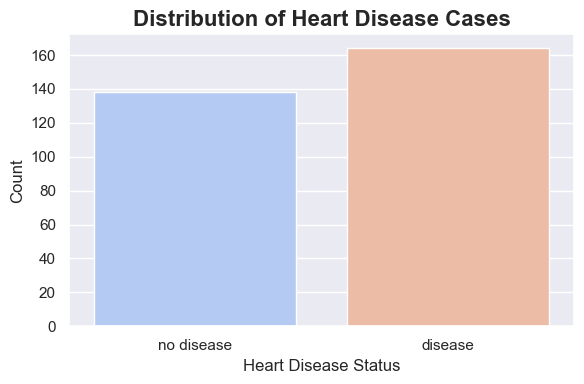

In [60]:
# Set size of plot
plt.figure(figsize=(6,4))

# Plot countplot from seaborn (sns)
sns.countplot(df_eda, x="heart_disease", palette="coolwarm")

# Set title and labels
plt.title("Distribution of Heart Disease Cases", fontsize=16, fontweight="bold")
plt.xlabel("Heart Disease Status")
plt.ylabel("Count")

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout() 

# Display plot
plt.show()

>The visualization confirms the descriptive findings: the dataset contains a slightly higher number of patients with heart disease (164) than those without (138).

#### ***1.2 Feature: Age Analysis (age)***

Age is one of the indicators of heart disease risk. As individuals grow older, their cardiovascular system undergoes physiological changes such as stiffening of blood vessels, increased blood pressure, and reduced heart efficiency.<br>
Understanding the distribution of age in the dataset helps identify the general patient demographic and detect potential outliers or unrealistic values.

##### *Descriptive Exploration*

In [64]:
# Descriptive statistics for Age
df_eda["age"].describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

>The age statistics show that:
>- The mean represents the average patient age.
>- The min and max confirm realistic age values.
>- The standard deviation indicates how widely ages vary across patients.

##### *Visual Exploration*

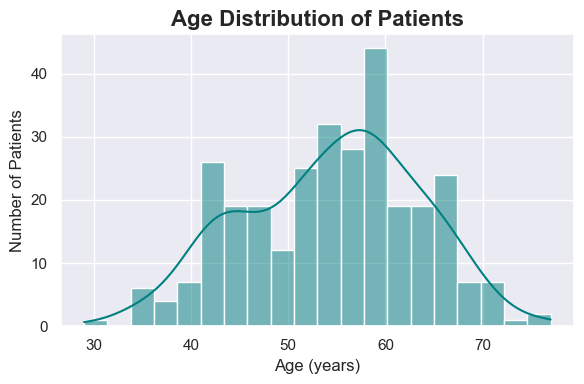

In [67]:
# Set size of plot
plt.figure(figsize=(6,4))

# Plot Histogram (histplot from seaborn (sns))
sns.histplot(df_eda, x="age", kde=True, color="teal", bins=20)

# Set title and labels
plt.title("Age Distribution of Patients", fontsize=16, fontweight="bold")
plt.xlabel("Age (years)")
plt.ylabel("Number of Patients")

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout() 

# Display plot
plt.show()

The histogram shows the distribution of patient ages:
- Most patients are between 40–65 years, where heart disease risk is highest.
- A right skew suggests more younger patients (possible early-onset cases or sampling bias).
- A left skew indicates more elderly patients.

>In summary, the dataset captures a realistic age range for heart disease prediction.

#### ***1.3 Feature: Gender Analysis (gender)***

Gender is an important demographic factor in heart disease prediction.<br>
Historically, men have been observed to develop heart disease earlier in life, while women’s risk increases after menopause due to hormonal changes.<br>
Examining the distribution of genders in the dataset helps understand whether both sexes are fairly represented and whether any bias might exist in the data.

##### *Descriptive Exploration*

In [71]:
# Calculate proportion of each gender
gender_dist = (df_eda["gender"].value_counts(normalize=True) * 100).round(2)

gender_dist

gender
male      68.21
female    31.79
Name: proportion, dtype: float64

Most patients are male (68.21%), showing that men make up a larger portion of the dataset and may have a higher recorded incidence of heart disease.

##### *Visual Exploration*

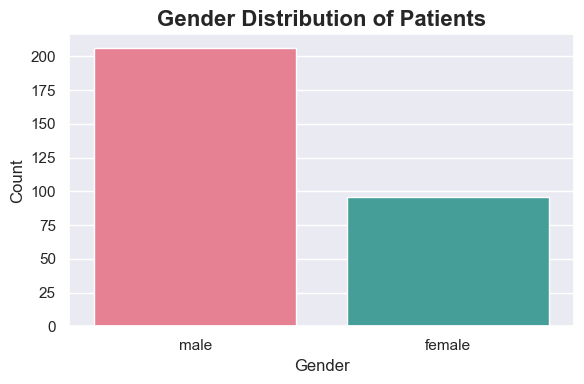

In [74]:
# Set size of plot
plt.figure(figsize=(6,4))

# Plot countplot from seaborn (sns)
sns.countplot(df_eda, x="gender", palette="husl")

# Set title and labels
plt.title("Gender Distribution of Patients", fontsize=16, fontweight="bold")
plt.xlabel("Gender")
plt.ylabel("Count")

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout() 

# Display plot
plt.show()

>Male patients make up most of the dataset, reflecting real-world trends where men face higher early-onset heart disease risk. This imbalance should be noted to prevent gender bias in analysis and predictions.

#### ***1.4 Key Medical Features Analysis***

To summarize the distribution of core medical indicators associated with heart disease risk, we visualize **Resting Blood Pressure**, **Cholesterol Measure**, **Maximum Heart Rate**, and **Chest Pain Type** in a single figure.  

These variables are crucial because they reflect the cardiovascular health of patients: elevated blood pressure or cholesterol, chest pain type and reduced maximum heart rate can indicate higher risk levels.

##### *Visual Exploration*

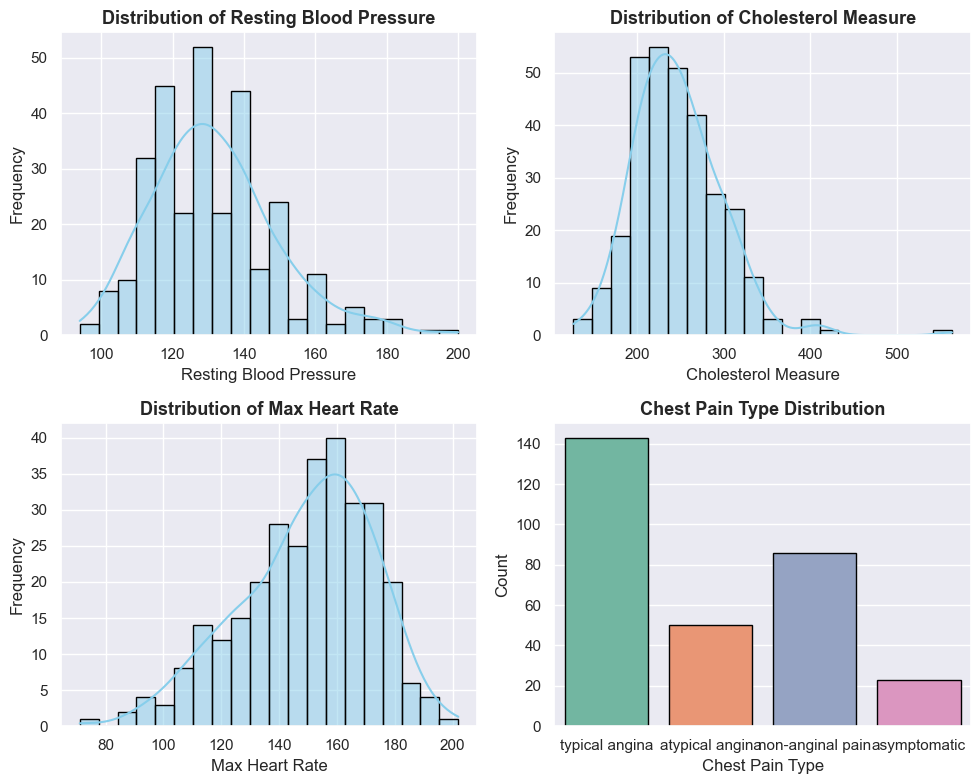

In [78]:
# Define key numerical medical features
medical_features = ["resting_blood_pressure", "cholesterol_measure", "max_heart_rate"]

# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through each numerical feature and plot its distribution
for ax, feature in zip(axes[:3], medical_features):
    sns.histplot(df_eda[feature], kde=True, bins=20, ax=ax, edgecolor="black", color="skyblue")
    ax.set_title(f"Distribution of {feature.replace('_', ' ').title()}", fontsize=13, fontweight="bold")
    ax.set_xlabel(feature.replace('_', ' ').title())
    ax.set_ylabel("Frequency")

# Plot categorical feature: Chest Pain Type
sns.countplot(x="chest_pain_type", data=df_eda, ax=axes[3], palette="Set2", edgecolor="black")
axes[3].set_title("Chest Pain Type Distribution", fontsize=13, fontweight="bold")
axes[3].set_xlabel("Chest Pain Type")
axes[3].set_ylabel("Count")

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout()

# Display plots
plt.show()

##### **Resting Blood Pressure:**  
RBP measures arterial pressure when the heart rests between beats, a vital indicator of cardiovascular health.<br>Normal RBP ranges from 90–120 mm Hg, while values above 140 mm Hg indicate hypertension.<br>Most patients fall between 120–140 mm Hg, with some outliers up to 200 mm Hg, suggesting possible hypertension.  
This supports RBP as a predictor of heart disease.  

##### **Cholesterol Measure:**  
The distribution skews slightly right, with most patients between 200–300 mg/dl and some exceeding 300 mg/dl.<br>High cholesterol contributes to arterial plaque buildup, making it an important factor for cardiovascular risk modeling.  

##### **Maximum Heart Rate:**  
The distribution is roughly bell-shaped, peaking around 150–170 bpm, showing most patients achieved healthy exercise heart rates.<br>Lower outliers may represent older or less fit individuals, highlighting links between fitness level and heart performance.  

##### **Chest Pain Type:**
The majority of patients experienced typical angina (pain caused by reduced blood flow), followed by non-anginal pain (pain caused by other causes), atypical angina (pain caused by partial blockage), and asymptomatic (no pain), showing that most chest pain cases are symptomatic (serving as a symptom or sign).


Together, these visuals clearly show how vital signs vary among patients and how each relates to heart disease risk.

>**Note:** <br>
Although the dataset includes additional clinical variables such as ST depression, ST slope, major vessel count, thalassemia status, resting ECG results, fasting blood sugar, and exercise-induced angina, these features are more meaningful when analyzed in relation to the target variable. Hence, they will be explored in the bivariate and multivariate analysis stages, where their diagnostic patterns can be more accurately assessed.

### ***Step 2: Bivariate Analysis - Feature (Predictors) vs Target Relationship***

The goal of this step is to explore how each predictor variable relates to the target variable (heart_disease).<br>
By comparing features against the target, we can identify which medical indicators have the strongest impact on heart disease likelihood.

This step helps answer critical medical and analytical questions such as:

* Does the risk of heart disease increase with age?
* Which chest pain types or thalassemia statuses are most associated with heart disease?
* Do clinical factors like cholesterol, resting blood pressure, or maximum heart rate show distinct patterns between patients with and without heart disease?
* Are the risk different between genders?

We’ll examine both numerical and categorical features separately.

#### ***2.1 Numerical Features vs Heart Disease***

#### *Age vs Heart Disease*

In the univariate analysis, we observed that most patients fall within the 40–65 age range, with a few outliers at the extremes.<br>
Here, we examine how age varies between patients with and without heart disease to understand whether risk increases with age.

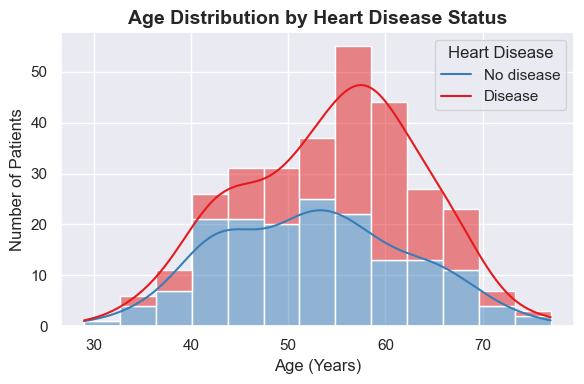

In [84]:
# -- Check the age bracket that is likely to be exposed to the disesase --

# Set size of plot
plt.figure(figsize=(6, 4))

# Plot histplot from seaborn
sns.histplot(df_eda, x='age', hue='heart_disease', kde=True, multiple='stack', palette='Set1')

# Set title, labels and legend
plt.title('Age Distribution by Heart Disease Status', fontsize=14, fontweight="bold")
plt.xlabel('Age (Years)')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Disease', labels=['No disease', 'Disease'])

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout() 

# Display plot
plt.show()

>Older individuals show a higher tendency toward heart disease, supporting medical evidence that age is a major risk factor.<br>As the heart and blood vessels weaken over time, the likelihood of cardiovascular issues naturally increases.


#### *Cholesterol Measure vs Heart Disease*

Cholesterol (`cholesterol_measure`) represents the level of serum cholesterol (mg/dl) in the blood.<br>
High cholesterol can lead to plaque buildup in arteries, increasing the risk of heart disease.<br>
Let’s investigate how cholesterol levels vary between patients with and without heart disease. 

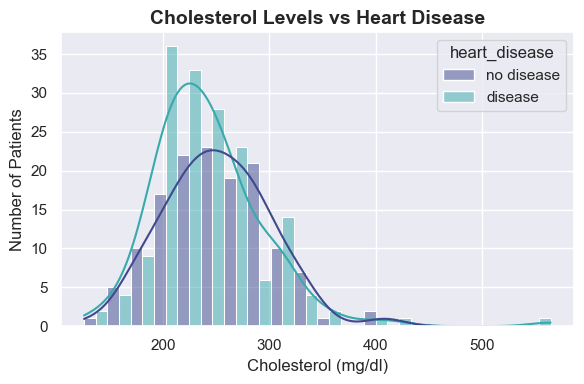

In [87]:
# -- Does higher cholesterol increase risk? --

# Set size of plot
plt.figure(figsize=(6,4))

# Plot Histogram (histplot from seaborn (sns))
sns.histplot(df_eda, x="cholesterol_measure",  hue="heart_disease", multiple='dodge', palette="mako", kde=True, bins=20)

# Set title and labels
plt.title("Cholesterol Levels vs Heart Disease", fontsize=14, fontweight="bold")
plt.xlabel("Cholesterol (mg/dl)")
plt.ylabel("Number of Patients")

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout() 

# Display plot
plt.show()

>Individuals with heart disease tend to have slightly higher cholesterol levels, though there’s notable overlap with those without the condition.<br>This suggests cholesterol contributes to heart disease risk but isn’t the strongest standalone predictor.


#### *Resting Blood Pressure vs Heart Disease*

Resting blood pressure (RBP) indicates the pressure in the arteries when the heart is resting between beats.
Higher RBP is often associated with hypertension: a known contributor to heart disease.

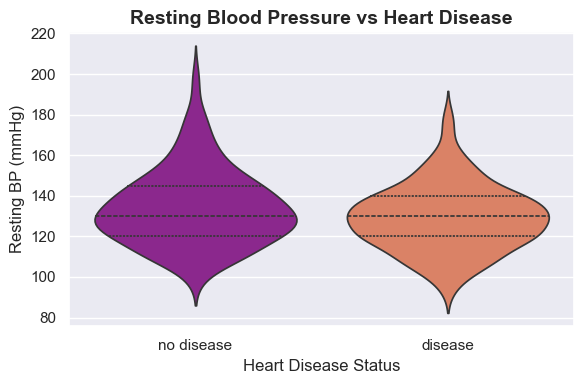

In [90]:
# -- Is high blood pressure a strong predictor? --

# Set size of plot
plt.figure(figsize=(6,4))

# Plot violinplot from seaborn
sns.violinplot(df_eda, x='heart_disease', y='resting_blood_pressure', palette='plasma', inner='quartile')

# Set title, labels and legend
plt.title("Resting Blood Pressure vs Heart Disease", fontsize=14, fontweight="bold")
plt.xlabel("Heart Disease Status")
plt.ylabel("Resting BP (mmHg)")

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout() 

# Display plot
plt.show()

>The violin plot shows that patients with heart disease generally have slightly higher resting blood pressure and a wider spread of high values.<br>However, the overlap between groups suggests it’s not the sole determining factor.<br>This means `resting_blood_pressure` contributes to heart disease risk but works best alongside other factors like age, cholesterol, and chest pain type.


#### *Maximum Heart Rate vs Heart Disease*

Maximum heart rate (thalach) represents the highest heart rate achieved during exercise.
Lower maximum heart rates often indicate reduced cardiovascular fitness and may correlate with a higher risk of heart disease.

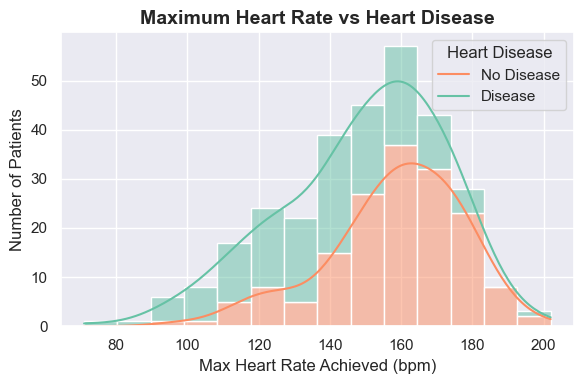

In [93]:
# -- Do patients with lower max heart rates have higher risk? --

# Set size of plot
plt.figure(figsize=(6,4))

# Plot histplot from seaborn
sns.histplot(df_eda, x='max_heart_rate', hue='heart_disease', kde=True, multiple='stack', palette='Set2')

# Set title, labels and legend
plt.title("Maximum Heart Rate vs Heart Disease", fontsize=14, fontweight="bold")
plt.xlabel("Max Heart Rate Achieved (bpm)")
plt.ylabel("Number of Patients")
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout() 

# Display plot
plt.show()

Individuals without heart disease generally exhibit higher maximum heart rates, reflecting better cardiac capacity.<br>
This supports the idea that lower maximum heart rate is associated with higher heart disease risk, aligning with medical expectations.

> **Note:**  <br>
Both `st_depression` (ECG depression levels) and `major_vessels_count` (number of major vessels seen under fluoroscopy) are continuous diagnostic features that may impact heart disease risk. Their relationships with the target variable will be examined later using correlation analysis and model feature importance instead of standalone visualizations.

#### ***2.2 Categorical Features vs Heart Disease***

#### *Gender vs Heart Disease*

Gender can play an important role in cardiovascular risk: men generally show a higher prevalence of heart disease at earlier ages, while women’s risk increases post-menopause.<br>
Let’s check how gender relates to heart disease in our dataset.

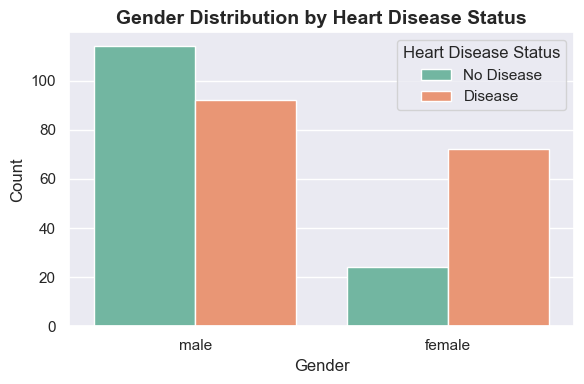

In [98]:
# -- Check which gender is most associated with the disease --

# Set size of plot
plt.figure(figsize=(6,4))

# Plot countplot from seaborn
sns.countplot(df_eda, x="gender", hue="heart_disease", palette="Set2")

# Set title, labels and legend
plt.title("Gender Distribution by Heart Disease Status", fontsize=14, fontweight="bold")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Heart Disease Status', labels=['No Disease', 'Disease'])


# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout() 

# Display plot
plt.show()

From the visualization:
- Male patients show a higher occurrence of heart disease compared to females.
- Female patients have fewer cases overall, possibly due to sample size differences.  

This aligns with real-world medical trends, confirming that gender plays an important role as a risk factor for heart disease.

#### *Chest Pain Type vs Heart Disease*

Chest Pain Type (`chest_pain_type`) is a crucial clinical indicator of heart disease.<br>
There are four major types:

* Typical angina (0): Chest discomfort during physical activity.
* Atypical angina (1): Unusual chest pain patterns.
* Non-anginal pain (2): Pain not related to heart conditions.
* Asymptomatic (3): No chest pain, though disease may exist silently.<br>

Here, we analyze how each chest pain type relates to heart disease presence.

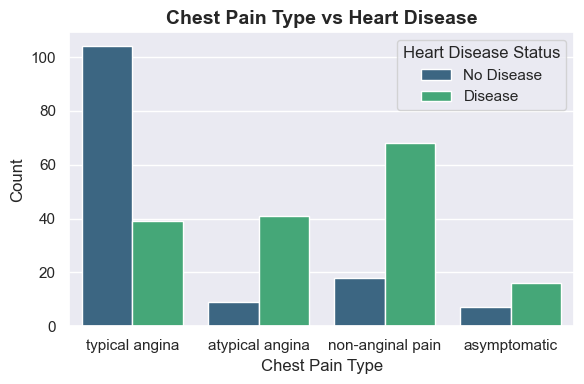

In [101]:
# -- Which Chest Pain type is most associated with heart disease? --

# Set size of plot
plt.figure(figsize=(6,4))

# Plot countplot from seaborn
sns.countplot(df_eda, x='chest_pain_type', hue='heart_disease', palette='viridis')

# Set title, labels and legend
plt.title('Chest Pain Type vs Heart Disease', fontsize=14, fontweight="bold")
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease Status', labels=['No Disease', 'Disease'])

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout() 

# Display plot
plt.show()

>From the chart, non-anginal and atypical angina pain types are strongly linked to heart disease, showing higher occurrence among diagnosed patients.<br>Typical angina appears more common in those without the disease, while asymptomatic cases are fewer but slightly higher among patients with heart disease.


#### *Thalassemia Status vs Heart Disease*

Thalassemia (`thal_status`) represents a genetic blood disorder affecting oxygen transport.
In this dataset, it’s encoded as:

- 0 — Normal
- 1 — Fixed defect
- 2 — Reversible defect
- 3 — Unknown

These categories can reflect how the heart reacts under stress, which helps in assessing cardiac health.<br>Let’s explore its relationship with heart disease.

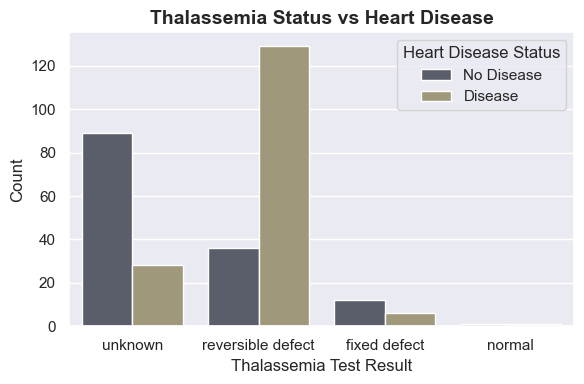

In [104]:
# -- How does thalassemia relate to heart disease presence? --

# Set size of plot
plt.figure(figsize=(6,4))

# Plot countplot from seaborn
sns.countplot(df_eda, x="thal_status", hue="heart_disease", palette="cividis")

# Set title, labels and legend
plt.title("Thalassemia Status vs Heart Disease", fontsize=14, fontweight="bold")
plt.xlabel("Thalassemia Test Result")
plt.ylabel("Count")
plt.legend(title='Heart Disease Status', labels=['No Disease', 'Disease'])

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout() 

# Display plot
plt.show()

From the visualization, patients with a reversible defect (thal = 2) show the highest proportion of heart disease, while those in the normal group have the lowest.<br> This suggests that thalassemia results are a strong diagnostic indicator and an important predictor for heart disease in the model.


> **Note:**  <br>
The remaining categorical variables: `fasting_blood_sugar`, `resting_ecg_result`, `exercise_induced_angina`, and `st_slope`, though medically relevant, are not visualized here. Their associations with heart disease will be statistically examined later using the Chi-square test to better capture their categorical relationships.

### ***Step 3: Multivariate Analysis - Feature Interactions***

Multivariate analysis examines how multiple features interact and collectively influence heart disease risk.  <br>
Unlike univariate or bivariate analyses (which look at one or two variables at a time), it reveals patterns that only appear through feature combinations.

We’ll perform two main tasks:

- **Pairwise Relationships (Pairplot)**
  - Visualize interactions among numerical variables, colored by the target (`heart_disease`).
  - Identify patterns such as clusters of heart disease patients (e.g., *older age + lower max heart rate*).

- **Correlation Matrix (Heatmap)**
  - Displays quantitative relationships among numerical features.
  - Detects **multicollinearity**, where independent variables are highly correlated, potentially confusing models and reducing performance.

We’ll focus on numerical predictors since correlation and pairplots work best for continuous data.

#### ***3.1 Pairwise Relationships (Pairplot)***


<Figure size 1000x800 with 0 Axes>

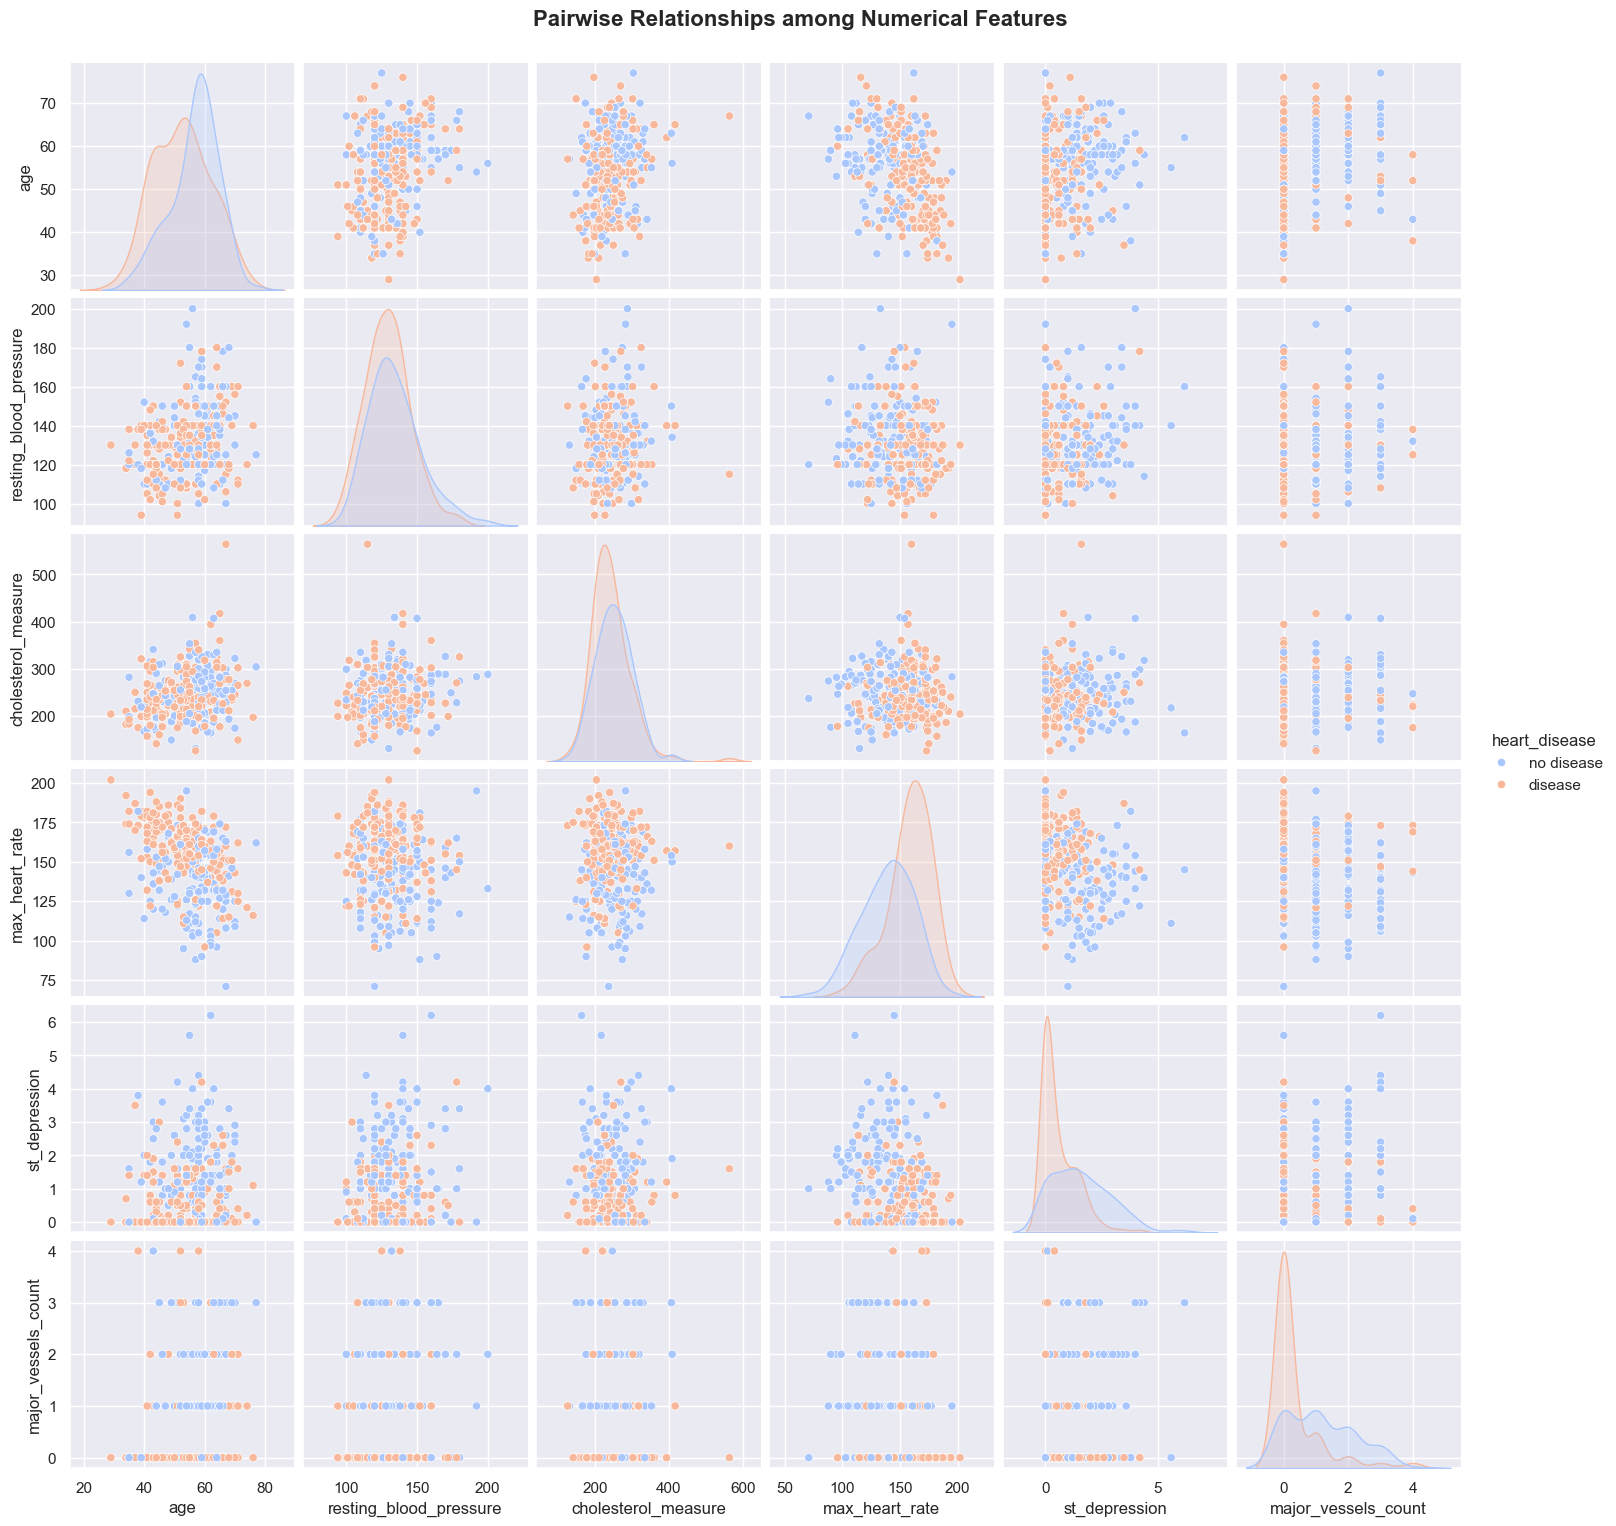

In [109]:
# -- Pairplot of Numerical Features Colored by Heart Disease --

# Select key numerical features
key_features = ["age", "resting_blood_pressure", "cholesterol_measure", "max_heart_rate", "st_depression", "major_vessels_count", "heart_disease"]

# Set size of plot
plt.figure(figsize=(10,8))

# Plot pairplot from seaborn
sns.pairplot(df_eda[key_features], hue="heart_disease", palette="coolwarm", diag_kind="kde")

# Set title and legend
plt.suptitle("Pairwise Relationships among Numerical Features", y=1.02, fontsize=16, fontweight="bold")

# Save current figure as an image
plt.savefig("pairplot.png")

# Display plot
plt.show()

>Patients with heart disease generally show lower maximum heart rates and higher ST depression values, indicating reduced heart performance.<br>
No strong linear relationships appear among most features, but subtle trends suggest that age and major vessel count also relate to disease presence.<br>
Physiological indicators like heart rate and ST depression are key differentiators between healthy and affected patients, and their non-linear patterns are better captured by tree-based models such as Decision Trees or Random Forests.


#### ***3.2 Correlation Heatmap - Feature-to-Feature Relationship***

Correlation shows how strongly two variables move together.

Range: -1 to +1
* +1 → perfect positive correlation
* -1 → perfect negative correlation
* 0 → no linear relationship


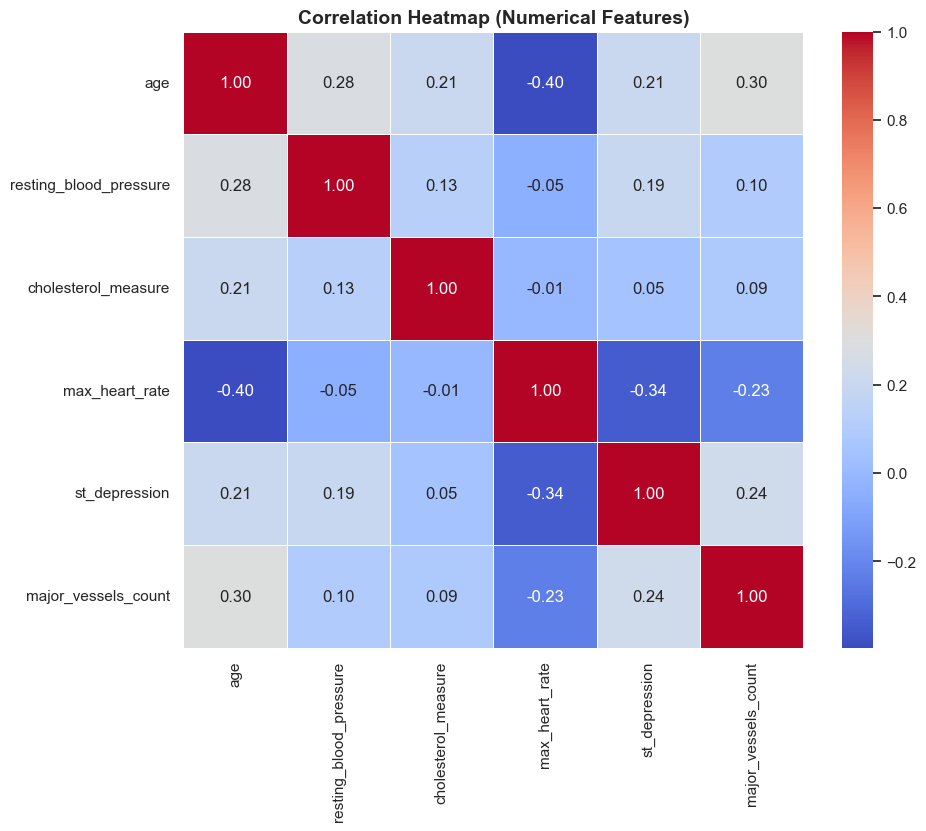

In [112]:
# -- Correlation Heatmap --

# Select key numerical features
numeric_cols = df_eda.select_dtypes(include=['int64', 'float64'])

# Calculate correlations between numerical features 
corr = numeric_cols.corr()

# Set size of plot
plt.figure(figsize=(10,8))

# Plot heatmap from seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set title
plt.title("Correlation Heatmap (Numerical Features)", fontsize=14, fontweight="bold")

# Display plot
plt.show()

The correlation heatmap reveals mostly weak to moderate relationships, showing low multicollinearity and confirming that each feature adds unique value to the model.

- Age negatively correlates with maximum heart rate (-0.40) and mildly positively with resting blood pressure (0.28) and major vessels count (0.30), indicating higher risk with age.
- ST Depression negatively correlates with maximum heart rate (-0.34) and positively with major vessels count (0.24), linking higher values to greater vessel blockage and lower heart performance.
- Cholesterol and resting blood pressure show weak correlations (<0.2), suggesting independent effects.

No correlation exceeds 0.8, confirming no multicollinearity. The most relevant features for modeling are age, maximum heart rate, ST depression, and major vessels count.

> ***Note:*** <br>
The correlation matrix above shows relationships among features only. We did not include the target variable (`heart_disease`) here because the matrix is intended to explore feature-to-feature correlations and detect potential multicollinearity. Correlations with the target are examined separately in Step 4.

### ***Step 4: Correlation Analysis - Feature-to-Target Relationship***

Correlation analysis shows how strongly each feature is associated with the target variable (`heart_disease`). This guides feature selection and informs modeling choices.<br>
This step supports feature selection by highlighting predictors with strong relationships to heart disease and informs modeling decisions by flagging redundant or weakly relevant features.

***Note:*** <br>We are using the model/main encoded dataframe `df` here instead of `df_eda` because `df` already has the target (`heart_disease`) in numeric form (0/1) and is cleaned/processed for modeling. This makes correlation computations straightforward.

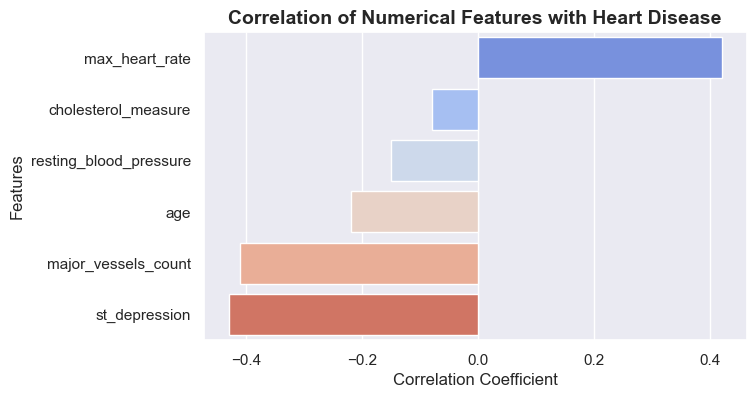

Correlation of features with Heart Disease:



,Feature,Correlation_Coef
0,max_heart_rate,0.42
1,cholesterol_measure,-0.08
2,resting_blood_pressure,-0.15
3,age,-0.22
4,major_vessels_count,-0.41
5,st_depression,-0.43


In [116]:
# Select key numerical features
key_features = ['age', 'resting_blood_pressure', 'cholesterol_measure', 'max_heart_rate', 'st_depression', 'major_vessels_count', 'heart_disease']

# Calculate correlations between numerical features and target
corr_with_target = df[key_features].corr()['heart_disease'].sort_values(ascending=False).round(2)

# Drop the target itself
corr_with_target = corr_with_target.drop('heart_disease')

# Set size of plot
plt.figure(figsize=(7,4))

# Plot barplot from seaborn
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='coolwarm')

# Set title and labels
plt.title('Correlation of Numerical Features with Heart Disease', fontsize=14, fontweight="bold")
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Display plot
plt.show()

# Display correlation values
print("Correlation of features with Heart Disease:\n")

# Convert Series to DataFrame
corr_with_target = corr_with_target.reset_index()
corr_with_target.columns = ["Feature", "Correlation_Coef"]

# Display DataFrame
display(corr_with_target)

>`st_depression` and `major_vessels_count` show the strongest negative correlations with heart disease, meaning higher values are linked to higher risk. In contrast, max_heart_rate has a positive correlation, indicating that lower heart rates are associated with disease presence. Other features like age, resting blood pressure, and cholesterol show weaker relationships.

### ***Step 5: Outlier Detection***

Identify extreme values in key numerical features such as age, cholesterol, blood pressure, and ST depression.


#### ***5.1 Visual Detection (Boxplots)***

We’ll use boxplots to visually inspect each numerical feature and quickly spot outliers.
Boxplots are based on the IQR (Interquartile Range) concept; any point beyond 1.5 × IQR from the lower or upper quartile is typically flagged as an outlier.

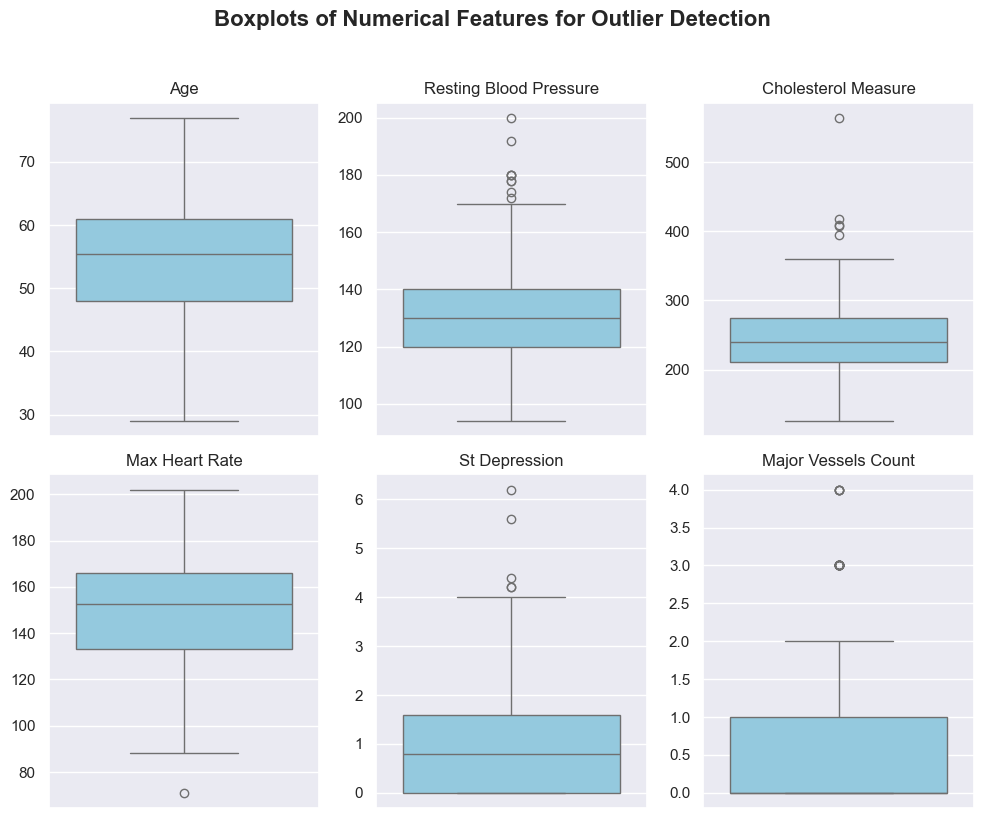

In [120]:
# -- Outlier visualization using boxplots --

# Select numerical features
numerical_features = ['age', 'resting_blood_pressure', 'cholesterol_measure', 
                      'max_heart_rate', 'st_depression', 'major_vessels_count']
# Set size of plot
plt.figure(figsize=(10, 8))

# Set title of the entire figure
plt.suptitle("Boxplots of Numerical Features for Outlier Detection", fontsize=16, y=1.02, fontweight="bold")

# Loop through each feature and plot its boxplot
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.boxplot(y=df_eda[feature], color="skyblue") # Plot boxplot for each feature
    plt.title(feature.replace("_", " ").title()) # Set title from feature name
    plt.xlabel("")  # remove x-label to maintain neat plot
    plt.ylabel("")  # remove y-label to maintain neat plot 

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout() 

# Display plot
plt.show()

The outlier analysis shows that most variables contain clinically meaningful extremes rather than errors. 
- Age is evenly distributed with no significant outliers.
- Resting Blood Pressure and Cholesterol have high-end outliers that likely represent hypertensive and hypercholesterolemic patients.
- Max Heart Rate shows balanced values within normal physiological ranges.
- ST Depression displays few high outliers linked to severe cardiac stress, while Major Vessels Count (3–4) reflects valid anatomical variation.

>Although mild outliers exist, they should be retained but standardized or scaled before modeling to reduce their influence.

#### ***5.2 Statistical Detection (IQR and Z-score Methods)***

**IQR Method**<br>

We’ll calculate the IQR for each feature and count how many outliers appear beyond the typical 1.5 × IQR range.

In [124]:
# -- IQR method for outlier detection --

Q1 = df_eda[numerical_features].quantile(0.25) # First quartile
Q3 = df_eda[numerical_features].quantile(0.75) # Third quartile
IQR = Q3 - Q1 # Interquartile Range

lower_whisker = Q1 - (1.5 * IQR) # Boxplot lower whisker
upper_whisker = Q3 + (1.5 * IQR) # Boxplot upper whisker

# Identify outliers
outliers_iqr = ((df_eda[numerical_features] < lower_whisker) | 
                (df_eda[numerical_features] > upper_whisker)).sum()

# Display the number of outliers detected in each numerical feature
print("Number of outliers detected using IQR method:\n")

# Convert Series to DataFrame
outliers_iqr = outliers_iqr.reset_index()
outliers_iqr.columns = ["Feature", "No_of_Outliers"]

# Display DataFrame
display(outliers_iqr)

Number of outliers detected using IQR method:



,Feature,No_of_Outliers
0,age,0
1,resting_blood_pressure,9
2,cholesterol_measure,5
3,max_heart_rate,1
4,st_depression,5
5,major_vessels_count,24


>Using the IQR method, the above number of outliers were detected per feature.<br>
>- Most outliers appear in `major_vessels_count`, likely reflecting patients with multiple affected vessels; medically valid cases, not data errors.
>- `resting_blood_pressure`, `st_depression`, and `cholesterol_measure` also show mild upper outliers, typical in cardiovascular datasets.

**Z-Score Method**<br>

The Z-score measures how far a data point is from the mean.<br>
Typically, data points with |Z| > 3 are considered outliers.

In [127]:
# Calculate the absolute Z-scores for all numerical features
z_scores = np.abs(stats.zscore(df_eda[numerical_features]))

# Count how many values in each column have a Z-score greater than 3 (considered outliers)
outliers_zscore = (z_scores > 3).sum(axis=0)

# Display the number of outliers detected in each numerical feature
print("\nNumber of outliers detected using Z-score method:\n")

# Convert Series to DataFrame
outliers_zscore = outliers_zscore.reset_index()
outliers_zscore.columns = ["Feature", "No_of_Outliers"]

# Display DataFrame
display(outliers_zscore)


Number of outliers detected using Z-score method:



,Feature,No_of_Outliers
0,age,0
1,resting_blood_pressure,2
2,cholesterol_measure,4
3,max_heart_rate,1
4,st_depression,2
5,major_vessels_count,4


>The Z-score method identified a small number of outliers across most numerical features, with `cholesterol_measure` and `major_vessels_count` showing the highest counts (4 each). These outliers represent data points more than three standard deviations from the mean. Compared to the IQR method, the Z-score approach is slightly stricter, detecting fewer extreme values. Since the outlier counts are relatively low, they are likely genuine medical variations rather than data errors, and can be retained for modeling.

### ***Step 6: Statistical Tests***

We need to confirm whether the observed relationships between features and heart disease are statistically significant, rather than occurring by chance.

We’ll use two simple types of tests:

- Chi-Square Test: For categorical features, checks if heart disease proportions differ across categories

- t-Test or ANOVA: For numerical features, checks if mean values differ between patients with and without heart disease.


We’ll interpret the results using the p-value:

- p < 0.05 → Statistically significant difference (feature likely influences heart disease)
- p ≥ 0.05 → No significant difference (feature may not have a strong direct effect)

#### ***6.1 Chi-Square Test for Categorical Features***

We’ll test all categorical features to determine whether they have a statistically significant relationship with heart disease. This helps confirm if differences in heart disease proportions across feature categories are meaningful or due to chance.

In [131]:
# -- Check statistically significant relationship with heart disease --

# Automatically select categorical features (excluding target)
categorical_features = df_eda.select_dtypes(include=['object', 'category']).columns.drop('heart_disease')

# Create an empty list to store results
chi_results = []

# Perform Chi-Square test for each categorical variable
for feature in categorical_features:
    contingency_table = pd.crosstab(df_eda[feature], df_eda['heart_disease'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_results.append({
        'Feature': feature.replace('_', ' ').title(),
        'Chi-Square Statistic': round(chi2, 3),
        'P-Value': round(p, 4),
        'Significant (p < 0.05)': 'Yes' if p < 0.05 else 'No'
    })

# Convert results to a DataFrame
chi_results_df = pd.DataFrame(chi_results)

# Display neatly
print("Chi-Square Test Results for Categorical Features:\n")
display(chi_results_df)

Chi-Square Test Results for Categorical Features:



,Feature,Chi-Square Statistic,P-Value,Significant (p < 0.05)
0,Gender,23.084,0.0000,Yes
1,Chest Pain Type,80.979,0.0000,Yes
2,Fasting Blood Sugar,0.092,0.7611,No
3,Resting Ecg Result,9.730,0.0077,Yes
4,Exercise Induced Angina,55.456,0.0000,Yes
5,St Slope,46.889,0.0000,Yes
6,Thal Status,84.610,0.0000,Yes


>Most categorical features show a **significant association** with heart disease (`p < 0.05`), suggesting they meaningfully contribute to prediction.  
Only **Fasting Blood Sugar** is **not significant**, indicating it may have limited impact.

#### ***6.2 Independent t-Test (for Numerical Features)***

We’ll check if the mean values of numerical features differ significantly between people with and without heart disease.

***Note:*** <br>We are using the model/main encoded dataframe `df` here instead of `df_eda` because `df` already has the target (`heart_disease`) in numeric form (0/1) and is cleaned/processed for modeling.

In [134]:
# -- Check statistically significant relationship with heart disease --

# Define numerical features
numerical_features = ['age', 'resting_blood_pressure', 'cholesterol_measure', 
                      'max_heart_rate', 'st_depression', 'major_vessels_count']

# Split the data based on target
heart_yes = df[df['heart_disease'] == 1]
heart_no = df[df['heart_disease'] == 0]

# Create list to store results
t_test_results = []

# Perform t-test for each numerical feature
for feature in numerical_features:
    t_stat, p = ttest_ind(heart_yes[feature], heart_no[feature])
    t_test_results.append({
        'Feature': feature.replace('_', ' ').title(),
        'T-Statistic': round(t_stat, 3),
        'P-Value': round(p, 4),
        'Significant (p < 0.05)': 'Yes' if p < 0.05 else 'No'
    })

# Convert results to DataFrame
t_test_results_df = pd.DataFrame(t_test_results)

# Display DataFrame
print("T-Test Results for Numerical Features:\n")
display(t_test_results_df)


T-Test Results for Numerical Features:



,Feature,T-Statistic,P-Value,Significant (p < 0.05)
0,Age,-3.934,0.0001,Yes
1,Resting Blood Pressure,-2.561,0.0109,Yes
2,Cholesterol Measure,-1.415,0.1580,No
3,Max Heart Rate,8.015,0.0000,Yes
4,St Depression,-8.229,0.0000,Yes
5,Major Vessels Count,-7.763,0.0000,Yes


>The independent t-test revealed that `age`, `resting_blood_pressure`, `max_heart_rate`, `st_depression`, and `major_vessels_count` all show statistically significant differences (p < 0.05) between individuals with and without heart disease.<br>
This indicates that these features vary meaningfully between the two groups and are likely to serve as strong predictors in the modeling phase.<br>
In contrast, `cholesterol measure` (p = 0.158) showed no significant difference, suggesting its influence on heart disease may be weaker or indirect within this dataset.

>The results emphasize that `age`, `max_heart_rate`, `major_vessels_count`, and `st_depression` are the most influential differentiating factors, aligning with earlier EDA findings.

### ***Summary: Exploratory Data Analysis (Feature Insights)***

The EDA uncovered meaningful trends and relationships within the dataset, highlighting features that are statistically and clinically associated with heart disease.

- Most patients were middle-aged (40–65 years), with males showing a higher likelihood of developing heart disease. Patients experiencing non-anginal and atypical chest pain types had higher disease prevalence than those with asymptomatic pain.

- Among numerical features, age, resting blood pressure, ST depression, and major vessels count tended to be higher in patients with heart disease, whereas maximum heart rate was notably lower. Cholesterol levels showed minimal variation between the two groups.

- Correlation analysis revealed moderate associations: ST depression (-0.43), major vessels count (-0.41), and maximum heart rate (0.42) were the most related to heart disease. No multicollinearity issues were detected among numerical variables.

- Mild outliers were observed in blood pressure, cholesterol, ST depression, and vessel count, yet retained as clinically valid values.

- Statistical testing confirmed that most features, including age, gender, chest pain type, resting blood pressure, maximum heart rate, ST depression, major vessels count, and thalassemia status, showed statistically significant associations with heart disease (p < 0.05). Cholesterol measure and fasting blood sugar were not statistically significant, indicating a weaker or indirect effect in this dataset.

>These findings provide strong insights into the factors influencing heart disease and will inform the modeling phase. All features will be included in the predictive models to allow feature importance and algorithmic evaluation to determine their actual contribution.


---------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------

## **Part 3: Machine Learning for Heart Disease Prediction**

Machine Learning (ML) offers powerful methods for uncovering complex patterns and making predictions from data. In healthcare, ML models can analyze multiple patient attributes to support early detection and diagnosis of diseases such as heart disease.

With the EDA completed, the next step is to prepare the dataset for modeling. All features will be retained to allow algorithms to determine their predictive contribution. The dataset will first be split into training and testing sets, ensuring the test set remains unseen. Numerical features will then be scaled using parameters derived from the training set to prevent data leakage. Insights from the EDA will guide interpretation and model evaluation to ensure reliable and accurate heart disease prediction.

The objective of this phase is to predict the likelihood of heart disease based on patient characteristics using supervised machine learning. This represents a **classification problem**, where the target variable (`heart_disease`) indicates whether a patient has the condition (1) or not (0).

The modeling workflow follows a structured process to ensure accuracy and interpretability:

* **Data Preparation:** Split the dataset into features (X) and target (y), then divide it into training and testing subsets.
* **Feature Scaling:** Standardize or normalize numerical variables to enable fair comparison across models.
* **Model Training:** Train multiple classification algorithms, including Logistic Regression, Decision Tree, Random Forest, and others.
* **Model Evaluation and Comparison:** Assess model performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to identify the most effective model.
* **Feature Importance and Interpretation:** Identify which features contribute most to predicting heart disease.
* **Hyperparameter Tuning:** Optimize the top-performing model to enhance accuracy and generalization.
* **Final Model Evaluation & Clinical Interpretation:** Summarize which features most strongly predict heart disease and the choosen models' performance.

In [140]:
# Display first five rows of encoded DataFrame "df"
df.head()

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol_measure,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels_count,thal_status,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### ***Step 1: Data Preparation and Split***

Before training any machine learning model, the dataset must be organized into features (X) and a target variable (y).<br>
The features (X) represent patient characteristics (age, gender, chest pain type, etc.), while the target (y) represents whether the patient has heart disease (1) or not (0).

Since the encoded dataset already contains numeric representations of categorical variables, we can move directly to splitting the data.

In [142]:
# Separate features and target
X = df.drop("heart_disease", axis=1)
y = df["heart_disease"]

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm that the split was performed correctly
print(f"Shape of training features: {X_train.shape}\n")
print(f"Shape of testing features: {X_test.shape}\n")
print(f"Shape of training target: {y_train.shape}\n")
print(f"Shape of testing target: {y_test.shape}")

Shape of training features: (241, 13)

Shape of testing features: (61, 13)

Shape of training target: (241,)

Shape of testing target: (61,)


>80% of the dataset (302 records) equals 241, and 20% equals 61; together, they sum up to the full dataset of 302 records.

#### ***1.1 Mutual Information Feature Relevance***

This evaluates how strongly each feature is associated with the target, helping to identify informative predictors before scaling and modeling.<br> Higher MI scores indicate stronger predictive relationships.

In [145]:
# Compute mutual information on training data
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)

# Create a DataFrame for better readability
mi_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Mutual_Information': mi_scores
}).sort_values(by='Mutual_Information', ascending=False).reset_index(drop=True)

display(mi_df)

,Feature,Mutual_Information
0,chest_pain_type,0.152036
1,thal_status,0.122552
2,major_vessels_count,0.115032
3,st_depression,0.088983
4,exercise_induced_angina,0.087357
5,cholesterol_measure,0.075123
6,max_heart_rate,0.070876
7,st_slope,0.060164
8,resting_ecg_result,0.017229
9,age,0.000000


Mutual Information was computed to confirm the statistical findings from Chi-square and t-tests. The results were consistent; features like chest pain type, thal status, major vessels count, and ST depression showed the highest dependency with heart disease.

> Although exploratory statistical analysis and mutual information scores revealed that certain variables (e.g., age, gender, fasting blood sugar) had weaker correlations with the target variable, all features will be retained for model training. This decision was made to preserve potential non-linear relationships and feature interactions that simple correlation or mutual information might not capture. In medical datasets, seemingly weak individual predictors can become clinically relevant when combined with other variables.

### ***Step 2: Feature Scaling/Normalization***

Feature scaling ensures all numerical features contribute equally during model training.<br>
Models such as Logistic Regression, KNN, and SVM are sensitive to differences in feature magnitude; without scaling, large-valued numerical features like cholesterol or blood pressure could overshadow smaller ones.

Since all features are numerical (continuous or label-encoded), we use StandardScaler to ensure all features contribute equally to distance-based and gradient-based models (e.g., Logistic Regression).

In [148]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data, then transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display shape of scaled training data
print(f"Scaled training data shape: {X_train_scaled.shape}")

# Preview scaled training set 
X_train_scaled

Scaled training data shape: (241, 13)


array([[ 1.42194408, -1.44559455,  0.98649276, ..., -0.69712735,
        -0.72271635,  1.07583844],
       [-0.46584105,  0.6917569 , -0.95428075, ..., -0.69712735,
        -0.72271635,  1.07583844],
       [ 0.42252843,  0.6917569 , -0.95428075, ..., -0.69712735,
         2.13260562,  1.07583844],
       ...,
       [ 0.42252843, -1.44559455, -0.95428075, ..., -0.69712735,
        -0.72271635, -0.54464321],
       [-1.13211815, -1.44559455,  0.98649276, ..., -0.69712735,
        -0.72271635, -0.54464321],
       [ 1.53299026,  0.6917569 ,  0.98649276, ...,  0.95000688,
         0.22905764,  1.07583844]])

In [149]:
# Convert back to DataFrame for easier interpretation
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Preview scaled training set DataFrame
X_train.head()

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol_measure,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels_count,thal_status
0,1.421944,-1.445595,0.986493,-0.973041,5.882908,-0.398314,-1.008059,0.408240,-0.652714,0.527263,-0.697127,-0.722716,1.075838
1,-0.465841,0.691757,-0.954281,0.756507,-0.885696,-0.398314,-1.008059,-1.104705,1.532065,-0.083233,-0.697127,-0.722716,1.075838
2,0.422528,0.691757,-0.954281,-0.197726,-0.588175,-0.398314,-1.008059,-0.882213,1.532065,1.050546,-0.697127,2.132606,1.075838
3,1.644036,0.691757,0.986493,0.517949,0.118437,-0.398314,-1.008059,-0.214737,-0.652714,0.876119,-0.697127,2.132606,1.075838
4,-1.021072,-1.445595,0.016106,-1.151959,-1.629499,-0.398314,0.875214,-0.570724,-0.652714,-0.868157,-0.697127,-0.722716,-0.544643


In [150]:
# Preview target training set
y_train.head()

158    1
199    0
479    0
460    0
169    1
Name: heart_disease, dtype: int64

>With the dataset now standardized, the next step is to train multiple classification models to predict the likelihood of heart disease.

### ***Step 3: Model Selection and Training***

In this step, we’ll train four supervised machine learning algorithms to predict the likelihood of heart disease.<br>
These models are chosen for their balance between simplicity, interpretability, and predictive power:

- Logistic Regression: baseline linear model for classification

- Decision Tree Classifier: interpretable, non-linear model

- Random Forest Classifier: ensemble of trees that improves stability and accuracy

- XGBoost Classifier: advanced gradient boosting algorithm for high performance

In [153]:
# -- Initialize Each model --

# Create a dictionary to store the machine learning models we want to compare
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

# -- Train models and store predictions --

# Create an empty dictionary to store predictions from each model
predictions = {}

# Loop through each model name and its corresponding model object in the dictionary
for name, model in models.items():

    # Train (fit) the model using the scaled training features(X_train) and corresponding training target(y_train)
    model.fit(X_train, y_train)

    # Display a confirmation message and model after each training
    print(f"{name} trained successfully:") 
    display(model)

    # Use the trained model to predict the labels of the scaled test features(X_test)
    y_pred = model.predict(X_test)

    # Store the predictions in the dictionary using the model name as the key
    predictions[name] = y_pred

print("Predictions from each model:")
predictions

Logistic Regression trained successfully:


LogisticRegression(random_state=42)

Decision Tree trained successfully:


DecisionTreeClassifier(random_state=42)

Random Forest trained successfully:


RandomForestClassifier(random_state=42)

XGBoost trained successfully:


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Predictions from each model:


{'Logistic Regression': array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64),
 'Decision Tree': array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64),
 'Random Forest': array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int64),
 'XGBoost': array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0])}

In [154]:
# -- Convert predictions to DataFrame --

# Convert prediction dictionary to DataFrame
pred_df = pd.DataFrame(predictions)

# Include the testing target to compare
# Create a column to store the values
pred_df['Actual'] = y_test.values

# Set testing target 'Actual' as index for easy comparison
pred_df.set_index("Actual", inplace=True)

# Display DataFrame
print("Model Predictions (first 10 rows):")
pred_df.head(10)

Model Predictions (first 10 rows):


,Logistic Regression,Decision Tree,Random Forest,XGBoost
Actual,,,,
0,0,0,0,0
0,1,0,1,1
0,0,0,0,0
0,1,1,1,1
0,1,1,1,1
0,0,0,0,0
1,1,1,1,1
0,0,0,0,0
1,1,1,1,1


In [155]:
# Confirm shape of prediction DataFrame to correspond with number of rows in testing target shape
pred_df.shape

(61, 4)

>All four models have now been successfully trained on the dataset, each learning unique decision patterns that can help predict heart disease.<br>
The next step will involve evaluating their performance using metrics such as accuracy, precision, recall, ROC-AUC, and F1-score to determine which model performs best.

### ***Step 4: Model Evaluation and Comparison***

After training the models, the next step is to assess how well each performs on unseen test data.<br>
Model evaluation helps determine which algorithm generalizes best; meaning it performs well not just on the training data but also on new, unseen samples.<br>

We’ll use multiple evaluation metrics. Each metric provides unique insights:

- Accuracy --> How often the model predicts correctly.

- Precision --> How many of the predicted positives were actually positive.

- Recall --> How many actual positives were correctly identified.

- F1-Score --> The harmonic mean of Precision and Recall (balances both).

- ROC-AUC Curve --> Measures how well the model distinguishes between classes (no disease and disease).

- Confusion Matrix --> Shows the breakdown of true vs predicted labels.

#### ***4.1 Evaluate Models***

In [159]:
# -- Evaluate Each Model --

# Create a list to store evaluation results
eval_results = []

# Loop through each model and its predictions
for name, y_pred in predictions.items():
    # Get the initialized model from models dictionary
    model = models[name]

    # Calculate predicted probability for ROC-AUC   
    y_proba = model.predict_proba(X_test)[:, 1] 

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    
    # Save results 
    eval_results.append({
        'Model': name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4),
        'ROC-AUC': round(roc_auc, 4)
    })
    
    # Print classification report
    print(f"* {name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Print ROC-AUC score
    print(f"ROC-AUC Score for {name}: {roc_auc:.4f}")
    print(f"{'-' * 70}\n")


* Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

ROC-AUC Score for Logistic Regression: 0.8712
----------------------------------------------------------------------

* Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

ROC-AUC Score for Decision Tree: 0.8019
----------------------------------------------------------------------

* Random Forest Classification R

> This block evaluates each trained model using key performance metrics to measure overall and class-specific performance.<br>
The results are stored in a list and displayed with a detailed classification report for easy comparison.

In [161]:
# -- Convert evaluation scores to DataFrame for easy comparison --

# Convert results into a DataFrame 
eval_df = pd.DataFrame(eval_results)

# Set model names as index 
eval_df.set_index("Model", inplace=True)

# Display DataFrame
eval_df

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Model,,,,,
Logistic Regression,0.8033,0.8000,0.8485,0.8235,0.8712
Decision Tree,0.8033,0.8182,0.8182,0.8182,0.8019
Random Forest,0.7541,0.7647,0.7879,0.7761,0.8588
XGBoost,0.7213,0.7353,0.7576,0.7463,0.8323


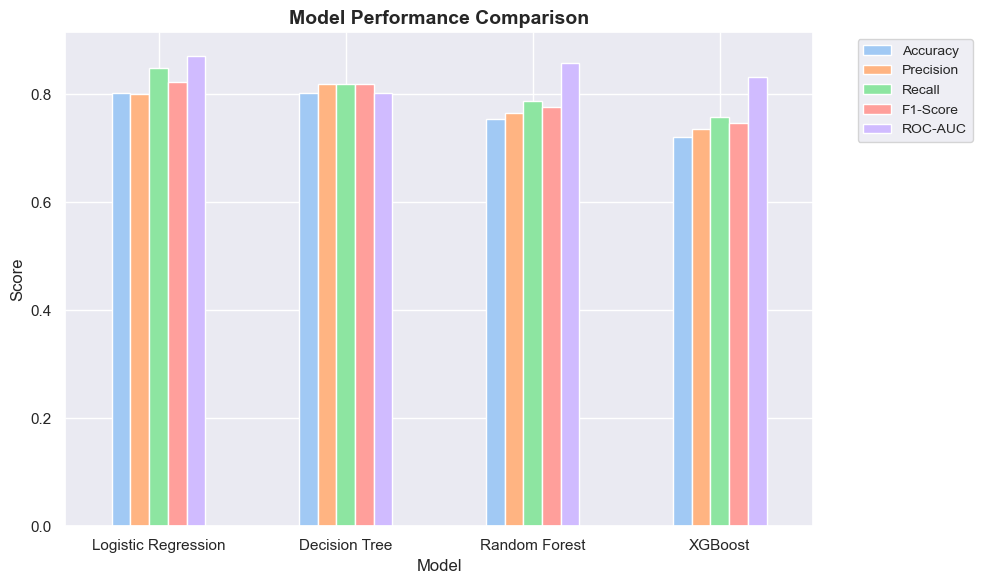

In [162]:
# -- Visualization of model performance comparison --

# Plot model performance comparison
eval_df.plot(kind='bar', figsize=(10, 6))

# Set title and label 
plt.title('Model Performance Comparison', fontsize=14, fontweight="bold")
plt.ylabel('Score', fontsize=12)

# Keep model names horizontal
plt.xticks(rotation=0)

# Move legend outside to avoid overlap with bars
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=10)

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout()

# Display plot
plt.show()

>All models performed reasonably well, but Logistic Regression achieved the best overall performance with the highest ROC-AUC (0.87) and F1-score (0.82), indicating strong balance between precision and recall.

>Decision Tree performed comparably in accuracy but with a slightly lower AUC, suggesting less stable predictions.<br>
Random Forest showed moderate results, while XGBoost underperformed slightly on this dataset.

#### ***4.2 Visualize ROC-AUC Curves for all Models***

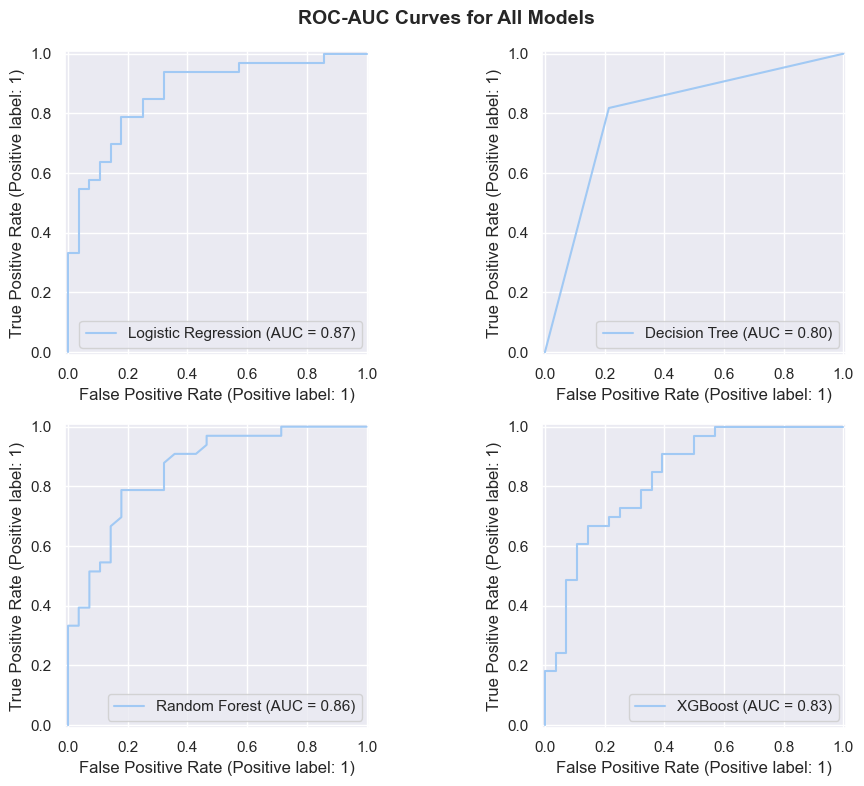

In [165]:
# Create a 2x2 grid for subplots, 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Logistic Regression
RocCurveDisplay.from_estimator(models['Logistic Regression'], X_test, y_test, ax=axes[0, 0], name='Logistic Regression')

# Decision Tree
RocCurveDisplay.from_estimator(models['Decision Tree'], X_test, y_test, ax=axes[0, 1], name='Decision Tree')

# Random Forest
RocCurveDisplay.from_estimator(models['Random Forest'], X_test, y_test, ax=axes[1, 0], name='Random Forest')

# XGBoost
RocCurveDisplay.from_estimator(models['XGBoost'], X_test, y_test, ax=axes[1, 1], name='XGBoost')

# Set main title
fig.suptitle("ROC-AUC Curves for All Models", fontsize=14, fontweight="bold")

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout()

# Display plot
plt.show()

>The closer a curve is to the top-left corner, the better the model performs, and Logistic Regression’s curve stays closest, proving it’s the best at separating positive and negative cases.

#### ***4.3 Error Analysis: Confusion Matrix Visualization for all Models***

The confusion matrix helps identify where a model makes correct and incorrect predictions, providing insights into potential sources of error and class imbalance effects.


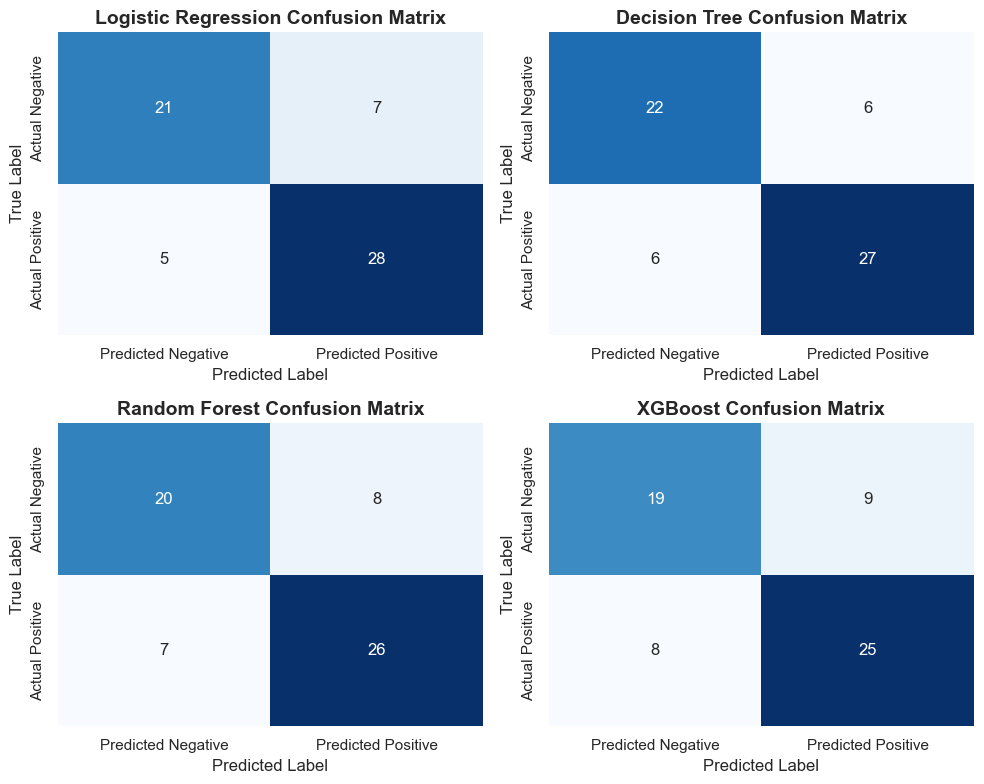

In [168]:
# Set size of plot
plt.figure(figsize=(10, 8))

# Loop through each model and its predictions, keeping track of the index
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    # Generate confusion matrix for each model
    cm = confusion_matrix(y_test, y_pred)

    # Plot each confusion matrix in a 2x2 grid
    plt.subplot(2, 2, i)

    # Define labels for xticks and yticks
    x_label = ['Predicted Negative', 'Predicted Positive']
    y_label= ['Actual Negative', 'Actual Positive']

    # Plot heatmap from seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=x_label, yticklabels=y_label)

    # Set title and labels
    plt.title(f"{name} Confusion Matrix", fontsize=14, fontweight="bold")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout()

# Display plot
plt.show()


> **True Positives (TP):** All models correctly identified about 25–28 positive cases.<br>
**True Negatives (TN):** The models correctly predicted around 19–22 negative cases.<br>
**False Positives (FP):** Few negative samples between 6 and 9 were incorrectly predicted as positive (lowest in Decision Tree).<br>
**False Negatives (FN):** Between 5 and 8 heart disease cases were missed, showing a small balance between correctly finding sick patients and avoiding false alarms.

All models show a balanced ability to detect both heart disease and non-disease cases. Logistic Regression correctly identifies most positive cases (high true positives, few false negatives), showing strong recall and overall reliability. Decision Tree performs similarly but with slightly more false positives. Random Forest and XGBoost have higher misclassifications, indicating slightly weaker distinction between classes.

>Logistic Regression provides the most consistent and clinically reliable predictions.

#### ***4.4 Learning Curve Analysis***

Learning curves show how each baseline model’s performance changes as more training data is used. They help detect underfitting (model too simple) or overfitting (model memorizing data instead of learning patterns). This step helps us understand how well each model learns before tuning and whether adding more data could improve performance.

> Since about 70% of the original dataset was removed due to duplicates, the remaining data is relatively small. Plotting learning curves helps evaluate whether the limited data is sufficient for stable model training or if performance is limited by dataset size.

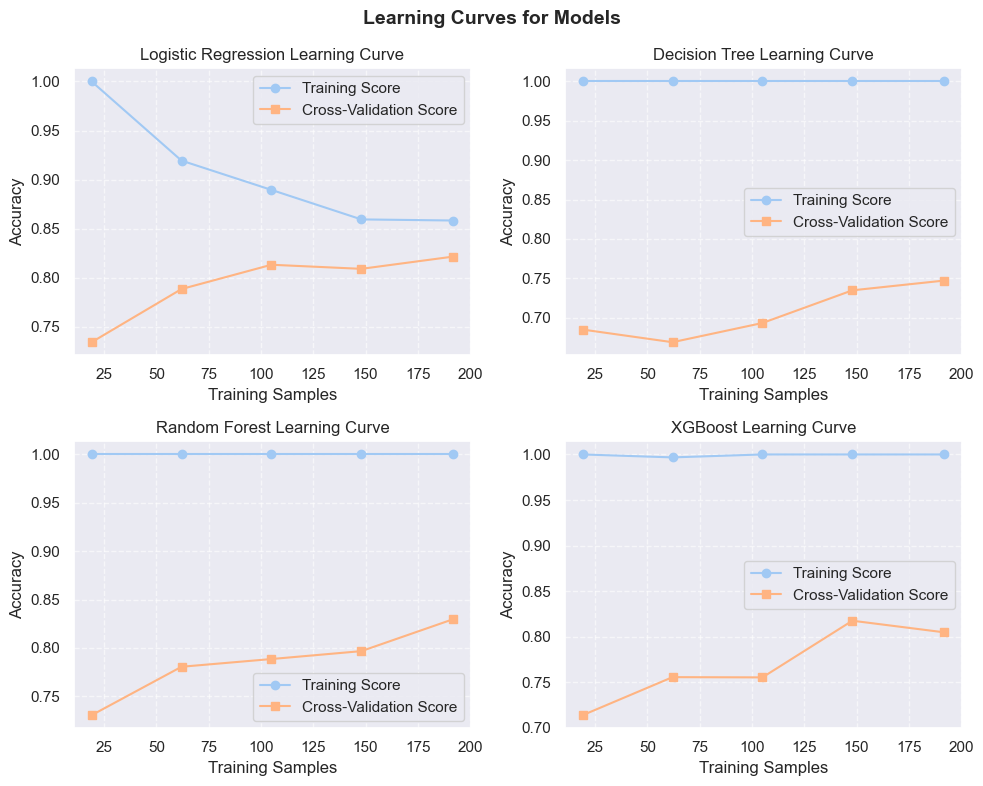

In [171]:
# Set size of plot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten axes for easy iteration and plot
axes = axes.ravel()  

# Loop through each model in models dictionary
for i, (name, model) in enumerate(models.items()):
    # Calculate learning curve scores
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train,
        y_train,
        cv=5, # Perform 5-fold cross-validation to ensure stable and reliable performance estimates
        scoring='accuracy',
        n_jobs=-1
    )

    # Calculate mean scores across folds
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    # Plot the learning curve
    axes[i].plot(train_sizes, train_mean, label='Training Score', marker='o')
    axes[i].plot(train_sizes, test_mean, label='Cross-Validation Score', marker='s')

    # Add titles and labels
    axes[i].set_title(f'{name} Learning Curve')
    axes[i].set_xlabel('Training Samples')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Set title
plt.suptitle("Learning Curves for Models", fontsize=14, fontweight='bold')

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout()

# Display plot
plt.show()

> - Training score: How well the model performs on the data it was trained on.
> - Cross-validation score: How well the model performs on new, unseen data (used to test generalization).

Based on the above curve:

- Logistic Regression training accuracy decreases with more data meaning it starts off overfitting, and cross-validation accuracy improves showing better generalization (how well the model learns the pattern instead of just memorizing the answers)

- Decision Tree training accuracy stays at 100% meaning it fits the training data perfectly, while cross-validation remains much lower, clearly showing overfitting.

- Random Forest shows high training accuracy (approx. 100%) with increasing cross-validation accuracy indicating that it still has some overfitting, but better generalization than Decision Tree.

- XGBoost is similar to Random Forest having almost perfect training score, but cross-validation improves more and stabilizes having best generalization among the tree-based models.

### ***Step 5: Feature Importance (from best performing models)***

Feature importance measures how much each input variable contributes to the model’s predictions.

Logistic Regression, Decision Tree, and Random Forest were chosen for further analysis because they gave the best mix of accuracy, precision, recall, f1 score, and ROC-AUC performance.<br>
The learning curves supports these choices: Logistic Regression showed stable learning with little overfitting, and Random Forest generalized better than a single Decision Tree, while XGBoost, although it learned well, had lower evaluation performance.
> - Logistic Regression –> Chosen because it is very accurate, reliable, and easy to understand why it makes its predictions.
> - Random Forest –> The model was selected to detect complex, non-linear feature relationships. It reduces prediction errors (bias and variance) by combining multiple trees, which also helps check its results against simpler, linear models.
> - Decision Tree –> We included it because its decision process is easy to see and provides a simple, logical explanation for how it makes predictions.


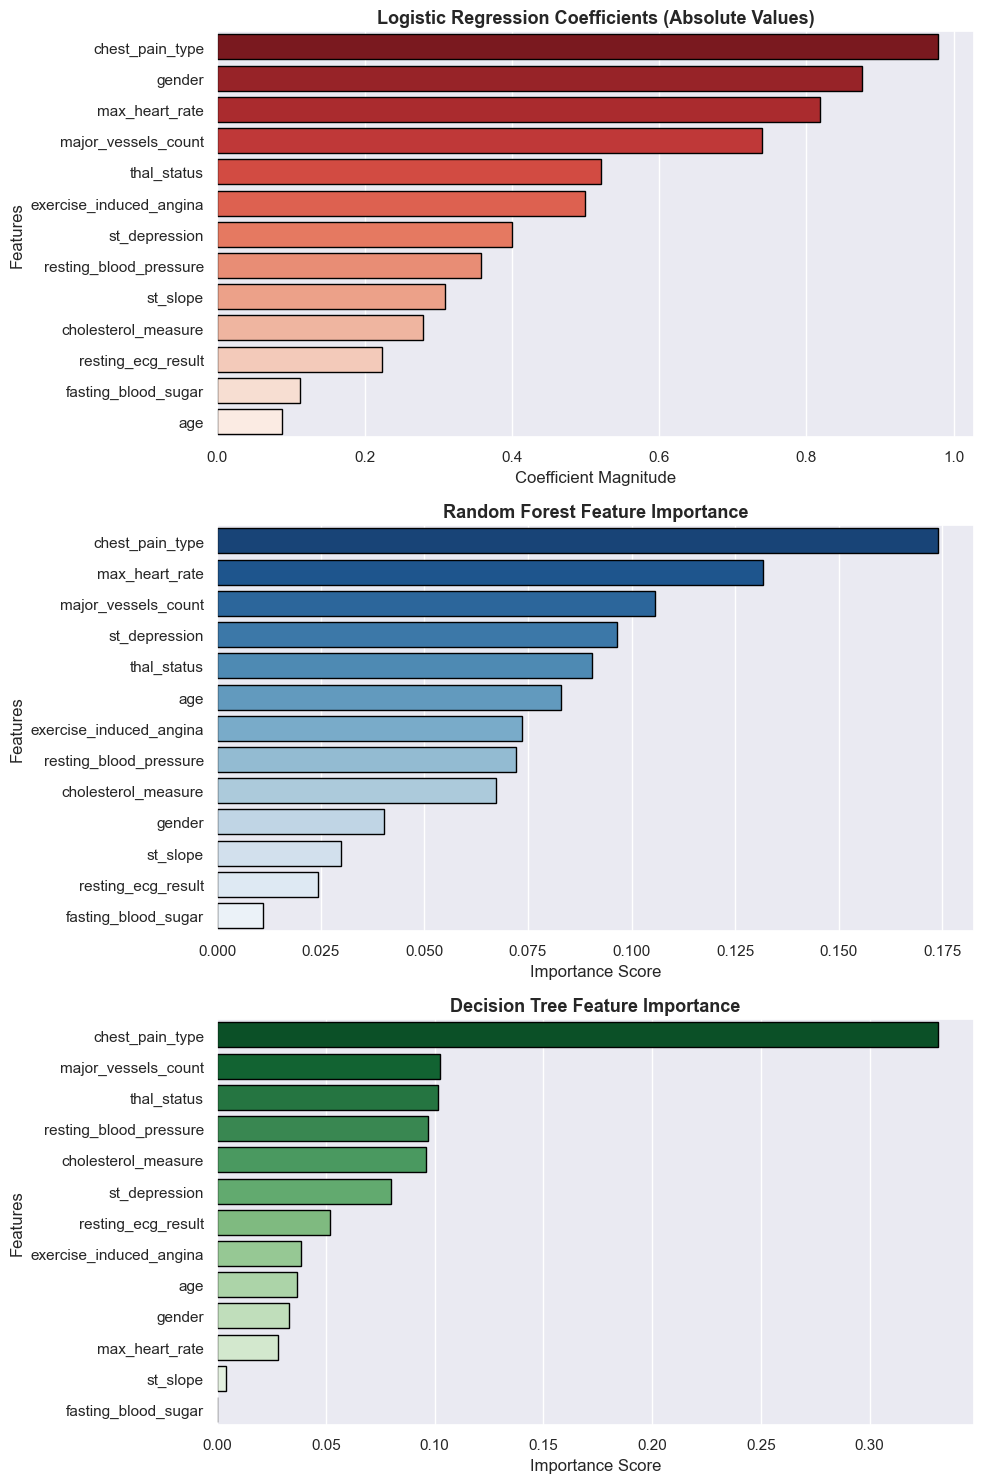

In [174]:
# --- Visualize importances and coefficients from each model ---

# Retrieve models directly from models dictionary
log_model = models['Logistic Regression']
rf_model = models['Random Forest']
dt_model = models['Decision Tree']

# Logistic Regression Importance (absolute values for magnitude) 
log_importance = pd.Series(
    np.abs(log_model.coef_[0]),
    index=X.columns
).sort_values(ascending=False)

# Random Forest Importance
rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Decision Tree Importance
dt_importance = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)


# --- Create vertically stacked subplots ---

# Create a 3x1 grid for subplots, 3 rows and 1 column
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Logistic Regression Importance Plot
sns.barplot(x=log_importance, y=log_importance.index, ax=axes[0], palette="Reds_r", edgecolor="black") # plot barplot
axes[0].set_title("Logistic Regression Coefficients (Absolute Values)", fontsize=13, fontweight="bold") # set title
axes[0].set_xlabel("Coefficient Magnitude") # set labels
axes[0].set_ylabel("Features")

# Random Forest Importance Plot
sns.barplot(x=rf_importance, y=rf_importance.index, ax=axes[1], palette="Blues_r", edgecolor="black") # plot barplot
axes[1].set_title("Random Forest Feature Importance", fontsize=13, fontweight="bold") # set title
axes[1].set_xlabel("Importance Score") # set labels
axes[1].set_ylabel("Features")

# Decision Tree Importance Plot
sns.barplot(x=dt_importance, y=dt_importance.index, ax=axes[2], palette="Greens_r", edgecolor="black") # plot barplot
axes[2].set_title("Decision Tree Feature Importance", fontsize=13, fontweight="bold") # set title
axes[2].set_xlabel("Importance Score") # set labels
axes[2].set_ylabel("Features")

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout()

# Display plot
plt.show()

In [175]:
# -- Convert feature importance to DataFrame for readability --

# Combine all feature importances into one DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'RF_Importance': rf_model.feature_importances_,
    'DT_Importance': dt_model.feature_importances_,
    'Log_Importance': np.abs(log_model.coef_[0])
}).set_index("Feature").sort_values(by="RF_Importance", ascending=False)


# Display DataFrame
feature_importance_df

,RF_Importance,DT_Importance,Log_Importance
Feature,,,
chest_pain_type,0.173969,0.331364,0.978893
max_heart_rate,0.131634,0.028018,0.818189
major_vessels_count,0.105700,0.102412,0.740095
st_depression,0.096577,0.079813,0.400050
thal_status,0.090418,0.101465,0.521572
age,0.083049,0.036734,0.087868
exercise_induced_angina,0.073679,0.038520,0.499109
resting_blood_pressure,0.072088,0.096783,0.358746
cholesterol_measure,0.067384,0.096064,0.279967


>Across all three models, **chest pain type**, **maximum heart rate**, and **number of major vessels** emerged as the most influential predictors of heart disease. **Logistic Regression** highlighted chest pain type and gender as dominant factors, while **Decision Tree** emphasized chest pain type and thalassemia status. **Random Forest**, however, showed a more balanced spread of feature importance, indicating that it relies on multiple variables such as **max heart rate**, **exercise-induced angina**, and **ST depression** to make predictions. This suggests that heart disease risk in the dataset is driven by a combination of **exercise-related and cardiovascular indicators**, rather than a single dominant feature.

>Together, these models provide a balanced and reliable understanding of feature importance from both statistical and clinical perspectives.

>The next step will be hyperparameter tuning, where we refine model parameters (especially for Random Forest) to maximize predictive performance.

### ***Step 6: Hyperparameter Tuning & Model Optimization***

Hyperparameter tuning helps optimize model performance by finding the best set of parameters (like tree depth, learning rate, or number of estimators) that make the model more accurate and generalizable.

We'll focus on **Logistic Regression**, **Random Forest**, and **Decision Tree** for hyperparameter tuning. Logistic Regression offers interpretability and a strong baseline, Random Forest captures complex, non-linear relationships, and Decision Tree provides a simple, interpretable model for comparison and validation.


> We’ll optimize the selected models for better generalization using Grid Search Cross-Validation (GridSearchCV).

In [178]:
# --- Hyperparameter Tuning (Logistic Regression, Random Forest, Decision Tree) ---

# Define parameter grids for each model 
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],             # Regularization strength
        'solver': ['liblinear', 'lbfgs'],         # Optimization algorithms suitable for small datasets
        'penalty': ['l2']                         # Type of regularization
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],          # Number of trees in the forest
        'max_depth': [3, 5, 7, None],             # Maximum tree depth
        'min_samples_split': [2, 5, 10],          # Minimum samples to split 
        'min_samples_leaf': [1, 2, 4],            # Minimum samples per leaf
        'bootstrap': [True, False]                # Whether bootstrap samples are used
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],         # Split quality metrics
        'max_depth': [3, 5, 7, 9, None],          # Maximum tree depth
        'min_samples_split': [2, 5, 10],          # Minimum samples to split
        'min_samples_leaf': [1, 2, 4]             # Minimum samples per leaf
    }
}

# --- Initialize models for tuning---
# Create a dictionary to store the machine learning models used for tuning
tune_models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Dictionary to store best models after tuning
best_models = {}

# Create list to store model results
results_summary = []

# --- Hyperparameter tuning using GridSearchCV ---

# Loop through models in tuning models dictionary for tuning and fitting
for name, model in tune_models.items():
    # GridSearchCV tests every parameter combination using cross-validation
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring='accuracy',  # Metric used for selecting best parameters
        cv=5,                # 5-fold cross-validation
        n_jobs=-1            # Use all CPU cores for faster computation
    )

    # Fit GridSearchCV on the training data
    grid_search.fit(X_train, y_train)

    # Display a confirmation message and model after each tuning with GridSearchCV
    print(f"{name} tuned successfully:") 
    display(grid_search)

    # Store the best model with optimal hyperparameters
    best_models[name] = grid_search.best_estimator_

    # Store the best parameters and corresponding mean Cross-Validation accuracy
    results_summary.append({
        'Model': name,
        'Best Parameters': grid_search.best_params_,
        'Mean Cross-Validation Accuracy': round(grid_search.best_score_, 4)
    })

    # Display tuning result
    print(f"{name}: \nBest Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}\n")

# --- Convert results to DataFrame to view Cross-Validation Score---
results_summary_df = pd.DataFrame(results_summary, 
                                  columns=[ 'Model', 'Mean Cross-Validation Accuracy']).rename(columns={"Mean Cross-Validation Accuracy": "Mean CV Accuracy"}).sort_values(
    by='Mean CV Accuracy', ascending=False
).reset_index(drop=True)

# Display the DataFrame
print(f"Cross Validation DataFrame:\n")
display(results_summary_df )

    

Logistic Regression tuned successfully:


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

Logistic Regression: 
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.8217

Decision Tree tuned successfully:


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Decision Tree: 
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8259

Random Forest tuned successfully:


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

Random Forest: 
Best Parameters: {'bootstrap': True, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8547

Cross Validation DataFrame:



,Model,Mean CV Accuracy
0,Random Forest,0.8547
1,Decision Tree,0.8259
2,Logistic Regression,0.8217


**GridSearchCV** automatically integrates **cross-validation** (`cv=5`) during tuning. **Cross-validation** means splitting the training data into multiple folds to ensure the model performs well on unseen data.
Each model is trained and validated on **five different folds** of the training data to ensure consistent and unbiased results.

> Cross-validation was first used to plot the model's performance on the learning curve. Then, before tuning, it gave us a fair idea of each model's basic performance. Finally, we built it into the tuning process (GridSearchCV) to find the best settings/parameter that consistently made the model stronger and less likely to memorize the training data.

The displayed **“Mean Cross-Validation Accuracy”** represents the **average accuracy** achieved across these folds, helping to identify the best parameter combination that generalizes well to unseen data.
Since the dataset is fairly balanced (heart disease ≈ 54%, no disease ≈ 46%), **accuracy** is an appropriate scoring metric because it fairly represents both classes without bias toward either group.

> After hyperparameter tuning, **Random Forest** achieved the highest cross-validation accuracy (85.47%), showing strong generalization and robustness.
**Decision Tree** followed closely (82.59%), while **Logistic Regression** performed slightly lower (82.17%) but remained strong and stable with optimal regularization (C=0.01), confirming its reliability.

>This confirms that ensemble methods like Random Forest capture complex feature interactions more effectively than single models.


In [180]:
# --- Dictionary to store tuned model predictions ---
tuned_predictions = {}

# --- Generate and save predictions for each tuned model ---
for name, best_model in best_models.items():
    # Predict on test data using best (tuned) model
    y_pred_tuned = best_model.predict(X_test)
    
    # Save predictions in dictionary
    tuned_predictions[name] = y_pred_tuned
    
print("Tuned Predictions Dictionary:\n")
display(tuned_predictions)

Tuned Predictions Dictionary:



{'Logistic Regression': array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64),
 'Decision Tree': array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int64),
 'Random Forest': array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)}

#### ***6.1 Evaluate best/tuned models on test set***

In [182]:
# Store evaluation results
results = []

# Loop through each best/tuned model and its predictions
for name, y_pred_tuned in tuned_predictions.items():
    
    # Get the tuned model from best_models dictionary
    best_model = best_models[name]

    # Calculate predicted probability for ROC-AUC   
    y_proba_tuned = best_model.predict_proba(X_test)[:, 1] 
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred_tuned)
    prec = precision_score(y_test, y_pred_tuned)
    rec = recall_score(y_test, y_pred_tuned)
    f1 = f1_score(y_test, y_pred_tuned)
    roc = roc_auc_score(y_test, y_proba_tuned)
    
    # Append results
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1-Score': round(f1, 4),
        'ROC-AUC': round(roc, 4)
    })
    
    # Print classification report
    print(f"{name} Tuned Performance on Test Set:")
    print(classification_report(y_test, y_pred_tuned))

    # Print ROC-AUC score
    print(f"ROC-AUC Score for {name}: {roc:.4f}")
    print(f"{'-' * 70}\n")
    

Logistic Regression Tuned Performance on Test Set:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

ROC-AUC Score for Logistic Regression: 0.8810
----------------------------------------------------------------------

Decision Tree Tuned Performance on Test Set:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        28
           1       0.75      0.73      0.74        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

ROC-AUC Score for Decision Tree: 0.7960
----------------------------------------------------------------------

Random Forest Tuned 

> This block evaluates each best/tuned model using key performance metrics to measure overall and class-specific performance.<br>
The results are stored in a list and displayed with a detailed classification report for easy comparison.

In [184]:
# -- Convert tuned evaluation scores to DataFrame for easy comparison --

# Convert results into a DataFrame for readability
results_df = pd.DataFrame(results)

# Set model names as index 
results_df.set_index("Model", inplace=True)

# Display DataFrame
results_df

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Model,,,,,
Logistic Regression,0.8033,0.7838,0.8788,0.8286,0.8810
Decision Tree,0.7213,0.7500,0.7273,0.7385,0.7960
Random Forest,0.8033,0.8000,0.8485,0.8235,0.8734


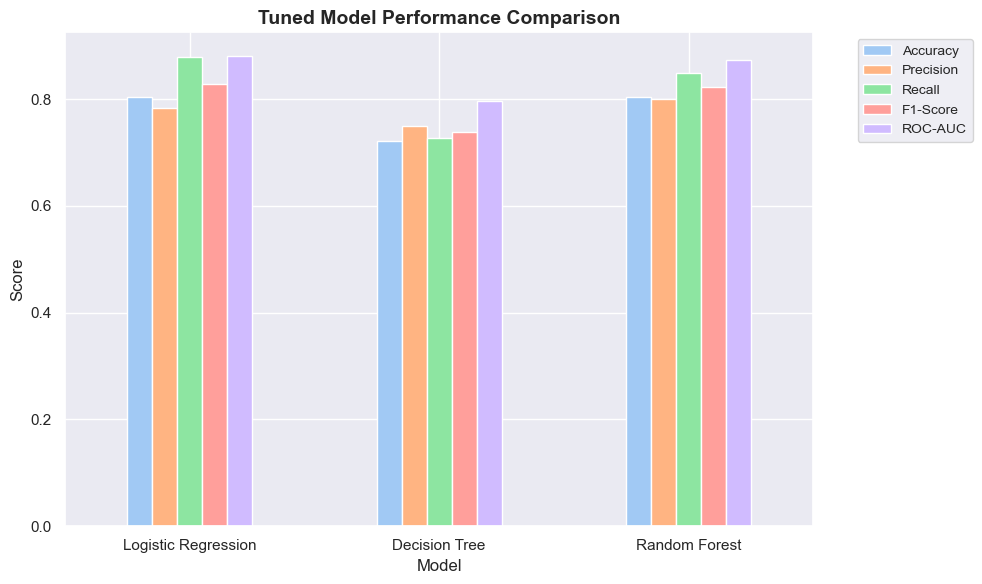

In [185]:
# -- Visualization of tuned model performance comparison --

# Plot model performance comparison
results_df.plot(kind='bar', figsize=(10, 6))

# Set title and label 
plt.title('Tuned Model Performance Comparison', fontsize=14, fontweight="bold")
plt.ylabel('Score', fontsize=12)

# Keep model names horizontal
plt.xticks(rotation=0)

# Move legend outside to avoid overlap with bars
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=10)

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout()

# Display plot
plt.show()

>Following hyperparameter tuning, **Random Forest** and **Logistic Regression** achieved the highest and nearly identical performance (~0.80 accuracy, ~0.88 ROC-AUC), showing strong and balanced predictive power. **Decision Tree** performed lower (0.72 accuracy, 0.80 ROC-AUC), indicating weaker generalization compared to the ensemble and regularized models.

#### ***6.2 Visualize ROC-AUC Curves for all best/tuned models***

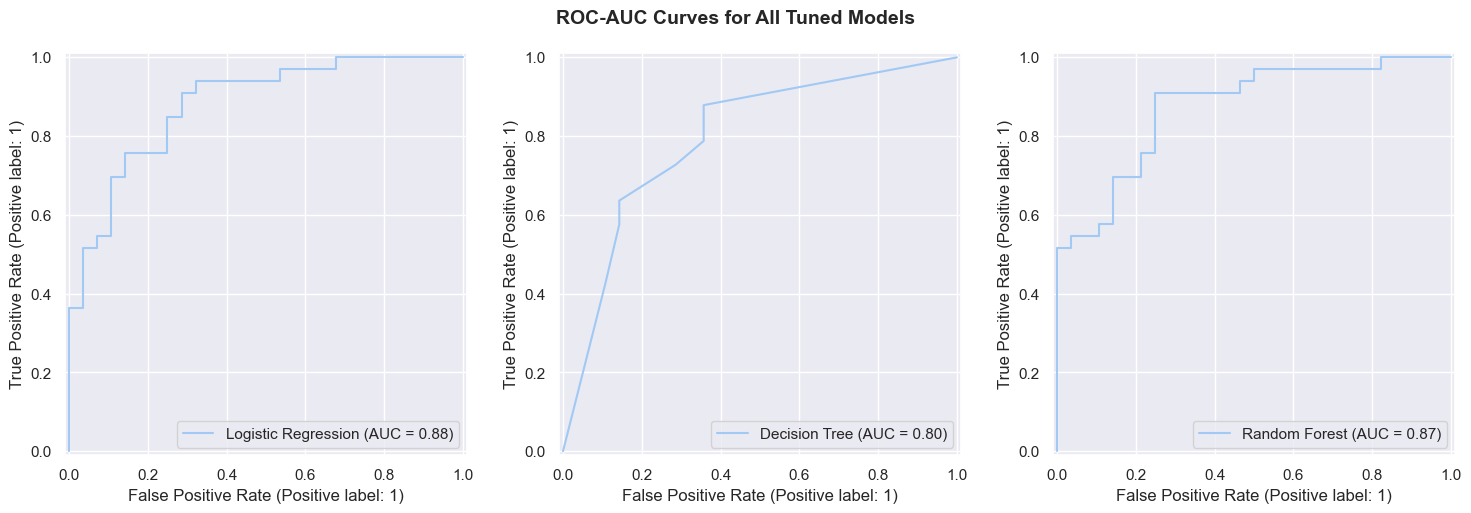

In [188]:
# Create a 1x3 grid for subplots, 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Logistic Regression
RocCurveDisplay.from_estimator(best_models['Logistic Regression'], X_test, y_test, ax=axes[0], name='Logistic Regression')

# Decision Tree
RocCurveDisplay.from_estimator(best_models['Decision Tree'], X_test, y_test, ax=axes[1], name='Decision Tree')

# Random Forest
RocCurveDisplay.from_estimator(best_models['Random Forest'], X_test, y_test, ax=axes[2], name='Random Forest')

# Set main title
fig.suptitle("ROC-AUC Curves for All Tuned Models", fontsize=14, fontweight="bold")

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout()

# Display plot
plt.show()

>The ROC-AUC curves shows that after tuning **Logistic Regression** (AUC = 0.88) and **Random Forest** (AUC = 0.87) achieved strong discrimination between classes, while the **Decision Tree** (AUC = 0.80) performs moderately, indicating slightly lower generalization. Hence, Logistic Regression and Random Forest appear to be the most dependable models.

#### ***6.3 Error Analysis: Confusion Matrix Visualization for all best/tuned Models***

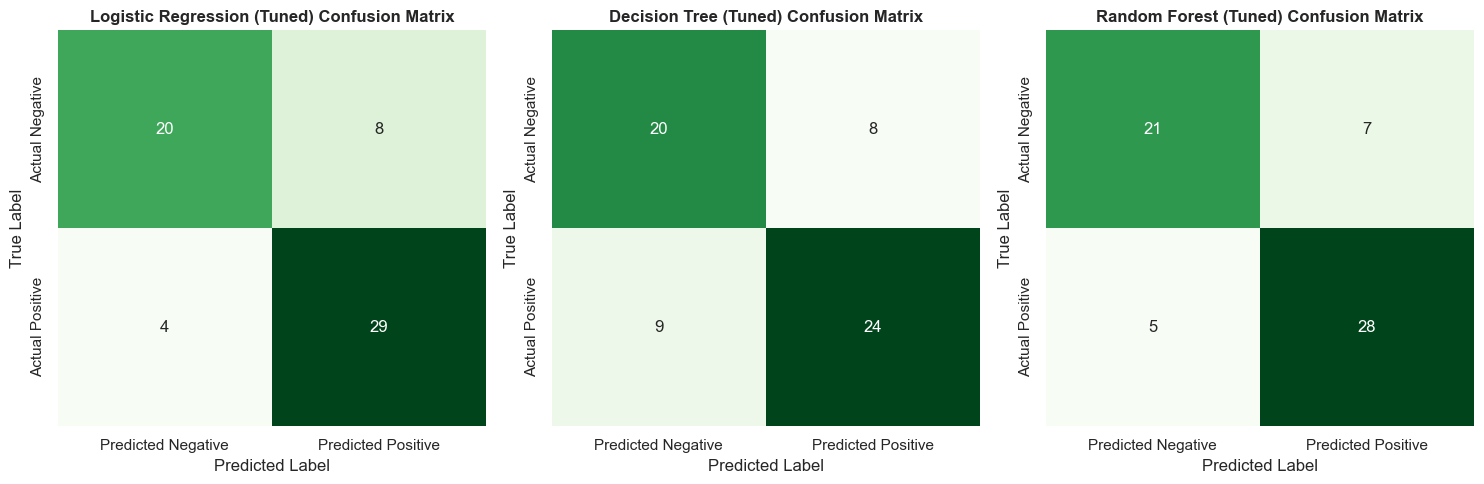

In [191]:
# --- Confusion Matrix for Tuned Models ---

# Set size of plot
plt.figure(figsize=(15, 5))

# Loop through each tuned model and its predictions, keeping track of the index
for i, (name, y_pred_tuned) in enumerate(tuned_predictions.items(), 1):
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred_tuned)

    # Plot each confusion matrix in a 1x3 grid (since we have 3 tuned models)
    plt.subplot(1, 3, i)

    # Define axis labels
    x_label = ['Predicted Negative', 'Predicted Positive']
    y_label = ['Actual Negative', 'Actual Positive']

    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
                xticklabels=x_label, yticklabels=y_label)

    # Set titles and labels
    plt.title(f"{name} (Tuned) Confusion Matrix", fontsize=12, fontweight="bold")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout()

# Display the plot
plt.show()


>The tuned models show strong performance overall. <br>Logistic Regression and Random Forest achieved the best balance, correctly identifying most positives (29 and 28) with few false negatives (4 and 5). Decision Tree performed slightly worse, misclassifying more positives (9). In summary, Logistic Regression and Random Forest provide more reliable and consistent predictions.

#### ***6.4 Learning Curve Analysis (Tuned Models)***

Learning curves for tuned models help confirm if hyperparameter tuning improved learning behavior. A smaller gap between training and validation scores indicates better generalization and reduced overfitting. This step ensures the tuned models are not only accurate but also stable and reliable when applied to new, unseen data.

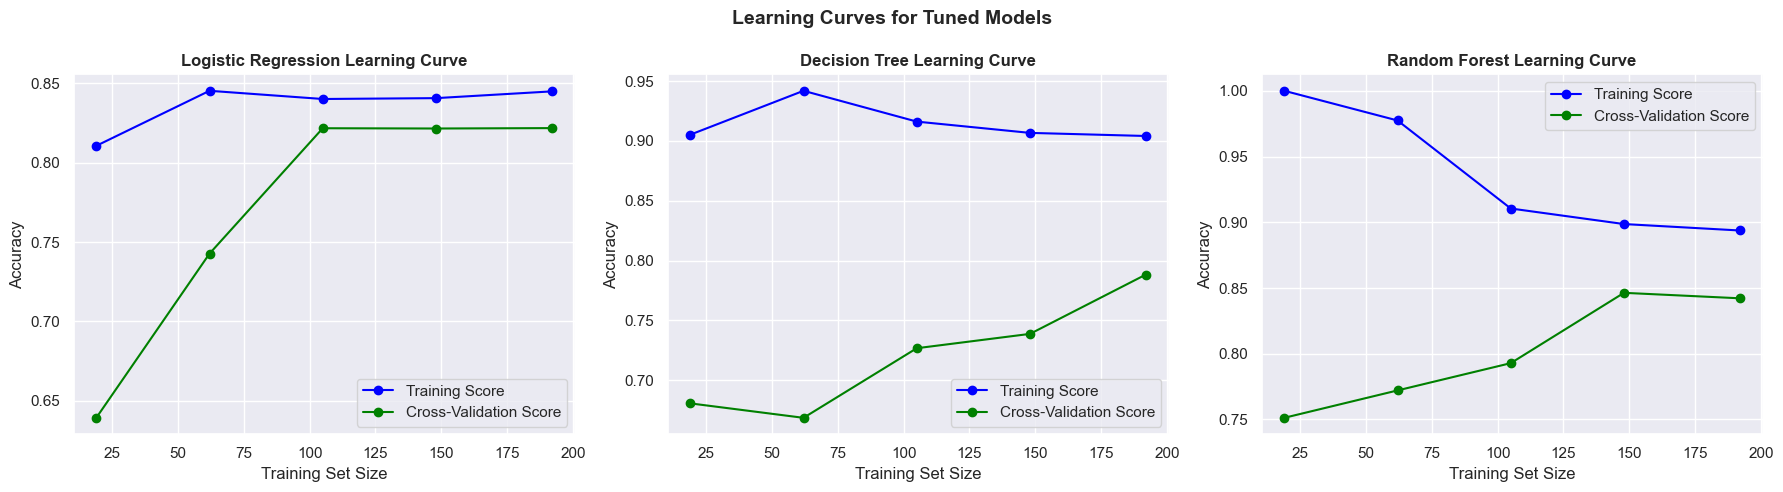

In [194]:
# Set figure size with 3 subplots horizontally (for 3 tuned models)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop through tuned models
for i, (name, model) in enumerate(best_models.items()):
    # Compute learning curve scores
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train,
        y_train,
        cv=5,  # Perform 5-fold cross-validation to ensure stable and reliable performance estimates
        scoring='accuracy',
        n_jobs=-1
    )

    # Calculate mean scores across folds - Cross Validation
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    # Plot learning curve
    axes[i].plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
    axes[i].plot(train_sizes, test_mean, label='Cross-Validation Score', color='green', marker='o')

    # Set title, labels and legend
    axes[i].set_title(f"{name} Learning Curve", fontsize=12, fontweight="bold")
    axes[i].set_xlabel("Training Set Size")
    axes[i].set_ylabel("Accuracy")
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout and show
plt.suptitle("Learning Curves for Tuned Models", fontsize=14, fontweight='bold')

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout()

# Display plot
plt.show()

- Logistic Regression: Training and validation scores are close and stable, showing good generalization and little overfitting.

- Decision Tree: Training accuracy is high but validation accuracy is lower, still some overfitting, though better than before tuning.

- Random Forest: Training accuracy slightly decreases while validation accuracy increases, indicating improved balance and strong generalization.

> After tuning, all models generalize better. Logistic Regression and Random Forest perform most consistently, while the Decision Tree still overfits slightly.

### ***Step 7: Final Model Evaluation & Clinical Interpretation***


#### ***7.1 Baseline vs Tuned Model Comparison***

After tuning, Logistic Regression and Random Forest showed better and more consistent predictions.<br>
The Decision Tree’s performance dropped (Accuracy: 72.13%), while Logistic Regression and Random Forest stayed strong (Accuracy: ~80.33%) with high recall and ROC-AUC scores.<br>
Logistic Regression performed best, with a recall of 0.8788 and ROC-AUC of 0.8810; crucial for medical predictions where identifying true positives (patients at risk) is more important than avoiding false positives (false alarms). 

| Model               | Version  | Accuracy | Precision | Recall     | F1-Score   | ROC-AUC    |
| ------------------- | -------- | -------- | --------- | ---------- | ---------- | ---------- |
| Logistic Regression | Baseline | 0.8033   | 0.8000    | 0.8485     | 0.8235     | 0.8712     |
| Logistic Regression | Tuned    | 0.8033   | 0.7838    | **0.8788** | **0.8286** | **0.8810** |
| Decision Tree       | Baseline | 0.8033   | 0.8182    | 0.8182     | 0.8182     | 0.8019     |
| Decision Tree       | Tuned    | 0.7213   | 0.7500    | 0.7273     | 0.7385     | 0.7960     |
| Random Forest       | Baseline | 0.7541   | 0.7647    | 0.7879     | 0.7761     | 0.8588     |
| Random Forest       | Tuned    | 0.8033   | 0.8000    | 0.8485     | 0.8235     | 0.8734     |

>Logistic Regression and Random Forest both achieved strong and consistent results, while Logistic Regression showed superior generalization and interpretability, making it the most clinically suitable model.

#### ***7.2 Model Reliability and Error Insights***

The confusion matrix of tuned models confirmed the following:

- **Logistic Regression:** 4 false negatives (FN) and 8 false positives (FP); excellent recall and acceptable precision.

- **Random Forest:** 5 FN and 7 FP; slightly higher precision, but one more missed case.

- **Decision Tree:** 9 FN and 8 FP; weakest discrimination among the three.

>In a healthcare setting, minimizing false negatives (missed high-risk patients) is vital. Logistic Regression’s low FN count indicates that it correctly identifies most heart disease cases, which supports its clinical suitability. 

#### ***7.3 Learning Curve Analysis***

Learning curve analysis showed that Logistic Regression learned the key patterns without overfitting, making it reliable for new patients.<br>
Random Forest also generalized well after tuning, maintaining a good balance between accuracy and variance.<br>
However, Decision Tree models had high training scores but low validation accuracy, showing they memorized the data instead of learning real patterns.


#### ***7.4 Feature Importance and Clinical Relevance***

Across all models, the top predictors were consistent with established cardiovascular research:
| Feature             | Random Forest Importance | Logistic Regression Coefficient |
| ------------------- | ------------------------ | ------------------------------- |
| chest_pain_type     | **0.174**                | **0.979**                       |
| max_heart_rate      | 0.132                    | 0.818                           |
| major_vessels_count | 0.106                    | 0.740                           |
| st_depression       | 0.097                    | 0.400                           |
| thal_status         | 0.090                    | 0.522                           |

- Chest Pain Type was the strongest predictor, aligning with medical findings that some angina-type chest pain and non-anginal pain often indicate coronary blockages.

- Maximum Heart Rate was negatively linked to disease presence; lower values indicate reduced cardiovascular fitness.

- Major Vessels Count and ST Depression indicate the extent of arterial narrowing and decreased oxygen flow to the heart muscle.

- Thalassemia Status (thal) also had a strong impact, consistent with its role in cardiac stress testing.

>Since Logistic Regression offers clear and interpretable coefficients, it can be directly applied in clinical decision-support systems to estimate heart disease risk while ensuring transparency, a vital aspect of healthcare analytics.

#### ***7.5 Clinical Insights***

From a clinical standpoint:

- Logistic Regression is preferred in healthcare because it gives clear, explainable results, each feature’s coefficient shows its direct impact on heart disease risk.

- Random Forest complements it by handling complex non-linear interactions and verifying that the same features remain important across different model types.

>Together, these models combine interpretability and predictive strength, providing both clinical trust and statistical reliability. From a medical standpoint, high recall is essential: it ensures most patients at risk are correctly identified, even if some false positives occur. In real clinical use, missing a high-risk patient (false negative) is far more dangerous than wrongly classifying a healthy one.

>The models’ predictions show that functional and physiological factors; such as chest pain, ST depression, and heart rate; are more important for diagnosis than demographic factors like age or gender. This aligns with real-world cardiology findings, where test-based indicators give clearer evidence of disease.

#### ***7.6 Conclusion***

Based on combined evaluation metrics, interpretability, and clinical relevance:

* Logistic Regression is chosen as the final primary model for clinical use.

  * It delivers strong and consistent performance (AUC = 0.88, F1 = 0.83).
  * Its transparency and interpretability help clinicians understand each predictor’s impact.
  * Although less flexible than ensemble methods, it generalizes well with minimal overfitting.

* Random Forest is selected as the secondary model, providing greater robustness and better handling of feature interactions but with lower interpretability. It can be used as a supporting model in automated diagnostic systems.


### ***Step 8: Model Saving for Deployment***

To enable future deployment or integration into a clinical application, the final tuned models (Logistic Regression and Random Forest) and fitted scaler are saved. This ensures consistent scaling and reproducible predictions during inference.

In [204]:
import pickle

# Write Logistic Regression into file
with open("final_logistic_regression.pkl", "wb") as file:
    pickle.dump(best_models["Logistic Regression"], file)

# Write Random Forest into file
with open("final_random_forest.pkl", "wb") as file:
    pickle.dump(best_models["Random Forest"], file)

# Write scaler into file
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Final tuned models and scaler saved successfully!")

Final tuned models and scaler saved successfully!


### ***Summary: Machine Learning for Heart Disease Prediction***

The Machine Learning phase focused on building and evaluating predictive models to identify patients at risk of heart disease based on key clinical features.

- The process began with data preparation and dataset splitting into training and testing sets for unbiased evaluation. Mutual Information analysis was performed to validate findings from the Chi-square and t-tests in exploratory analysis. The results aligned, with chest pain type, thal status, and ST depression showing the strongest dependency with heart disease. However, all variables were retained to preserve potential non-linear relationships and feature interactions that statistical tests or mutual information might miss. In medical datasets, even weak predictors can contribute valuable insights when combined with other features.

- Next, **feature scaling and normalization** were applied to standardize numerical variables, enhancing algorithm performance and convergence particularly for models like Logistic Regression that are sensitive to feature magnitude.

- Three models: **Logistic Regression, Decision Tree, and Random Forest**; were trained and tested. Performance metrics such as accuracy, precision, recall, F1-score, and ROC-AUC were calculated to measure predictive ability.<br>
  Initial results showed that Logistic Regression and Random Forest achieved strong and consistent accuracy and recall, outperforming the Decision Tree baseline.

- **Feature importance analysis** highlighted *chest pain type, maximum heart rate, ST depression, major vessels count,* and *thalassemia status* as top predictors, aligning with medical understanding of cardiovascular risk factors and the findings from exploratory analysis.

- To improve performance and reduce overfitting, **hyperparameter tuning** was done using GridSearchCV. This process optimized model parameters, boosting recall and generalization. After tuning, Logistic Regression showed the best balance of accuracy (80.33%), recall (87.88%), and interpretability.

- Final model insights revealed that **Logistic Regression** is the most clinically suitable model for heart disease prediction. Its coefficients clearly show how each feature affects disease risk, making it ideal for clinical decision support. The tuned model demonstrated stable generalization, few false negatives, and results consistent with medical knowledge, confirming its reliability for early risk detection. **Random Forest** complements it by capturing feature interactions and non-linear patterns, providing feature importance insights that align with real cardiology findings.



---------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------

##  Findings & Solutions: Predicting Heart Disease Risk Using Machine Learning

This project aimed to develop a predictive system that identifies patients at risk of heart disease using non-invasive clinical indicators. The work followed a complete data science workflow; from data cleaning and exploratory data analysis (EDA) to model development, evaluation, and clinical interpretation. The main goal was not only to achieve good prediction accuracy but also to make the model easy to understand and useful in a clinical setting, so that medical professionals can trust the results.


### **1. Data Quality and Preparation**

The dataset was well-prepared for modeling, with categorical variables already encoded and no missing records identified. Duplicate entries were removed to prevent bias, and feature names were standardized for clarity. In addition, two datasets were maintained:

* `df_eda` – a readable version for exploratory analysis
* `df` – an encoded version optimized for machine learning.

>Clinical checks were done to spot impossible or unrealistic values (like zero cholesterol or inaccurate blood pressure), to make sure the data was reliable. This solid foundation helped ensure that the modeling results were both statistically sound and clinically meaningful.

### **2. Exploratory Insights and Key Predictors**

Exploratory Data Analysis (EDA) revealed patterns consistent with established cardiovascular research. Patients diagnosed with heart disease were predominantly middle-aged males (40–65 years), aligning with global trends in cardiovascular epidemiology.

Key variable distributions showed:

* **Lower maximum heart rate** and **higher ST depression values** among patients with disease, reflecting reduced cardiac efficiency.
* **Chest pain type** as one of the strongest differentiators between healthy and diseased patients.
* **Major vessel count** and **thalassemia status (thal)** also displayed strong associations with heart disease, aligning with diagnostic imaging and perfusion test outcomes.

>These findings helped guide the modeling, evidence-based reason for building the model the way it was. Some variables, like cholesterol and fasting blood sugar, were kept at first for completeness, but later turned out to be less useful during model interpretation.

### **3. Model Development and Evaluation**

Four models were initially trained during experimentation:

1. **Logistic Regression**
2. **Decision Tree Classifier**
3. **Random Forest Classifier**
4. **XGBoost Classifier**

After baseline evaluation, the XGBoost model was excluded due to inconsistent performance and lack of interpretability compared to other approaches. The remaining three models were advanced to tuning and detailed evaluation.

Hyperparameter tuning via **GridSearchCV** improved performance and generalization, especially for Logistic Regression and Random Forest. Post-tuning, both models achieved accuracies around **80.3%** and ROC-AUC values near **0.88**, outperforming the Decision Tree, which suffered from overfitting.

| Model               | Version | Accuracy | Precision | Recall     | F1-Score   | ROC-AUC    |
| ------------------- | ------- | -------- | --------- | ---------- | ---------- | ---------- |
| Logistic Regression | Tuned   | 0.8033   | 0.7838    | **0.8788** | **0.8286** | **0.8810** |
| Decision Tree       | Tuned   | 0.7213   | 0.7500    | 0.7273     | 0.7385     | 0.7960     |
| Random Forest       | Tuned   | 0.8033   | 0.8000    | 0.8485     | 0.8235     | 0.8734     |

>Among the final models, **Logistic Regression** emerged as the top performer due to its high recall, strong generalization, and clear interpretability. In a clinical setting, recall is paramount; identifying patients at risk (true positives) is far more critical than minimizing false alarms.

>Random Forest provided additional robustness and confirmed the same key predictors as Logistic Regression, ensuring confidence in feature reliability. The Decision Tree, while easy to visualize, underperformed in validation, making it less suitable for clinical deployment.

### **4. Feature Importance and Clinical Insights**

Feature ranking from Logistic Regression coefficients and Random Forest importances both identified **chest pain type**, **maximum heart rate**, **ST depression**, **major vessel count**, and **thalassemia status** as the top five predictors.

These findings align with real-world cardiology insights:

* **Chest Pain Type:** Strongest indicator of arterial blockages or ischemia.
* **Maximum Heart Rate:** Lower rates suggest reduced cardiovascular fitness.
* **ST Depression:** Signals oxygen deprivation to heart muscle.
* **Major Vessels Count:** Reflects the extent of arterial narrowing.
* **Thalassemia Status:** Relates to abnormal blood flow and oxygen transport.

>This strong overlap between data-driven findings and medical literature reinforces the clinical validity of the final models.

### **5. Limitations**

Although the project produced strong results, there were a few limitations. The dataset, while clean and balanced, came from a specific group of patients, so the results may not apply equally well to other populations or hospitals. The models predict only a **yes or no** outcome for heart disease, which simplifies the more complex levels of risk seen in real life. Also, some important medical data (like imaging or detailed ECG results) was not included, which may limit how deeply the model can predict. In the future, this work could be improved by using larger and more diverse datasets, and by retraining the model regularly with real clinical data to make it more adaptable.

### **6. Model Deployment and Application**

The final **Logistic Regression model** is ideally suited for clinical deployment due to its interpretability and reliability. It can be integrated into hospital dashboards or electronic health record (EHR) systems to provide instant risk scoring based on patient data inputs such as age, chest pain type, resting blood pressure, and heart rate. Each coefficient offers transparent clinical meaning, enabling physicians to understand *why* a prediction was made.

The **Random Forest model** can serve as a **secondary validation layer**, offering stronger resilience against non-linear feature interactions and noisy data. Together, they provide a balanced system combining **explainability** and **robustness**.

Potential deployment could involve:

* A web-based or desktop **clinical decision-support tool**.
* Integration with hospital databases for automatic patient risk updates.
* Continuous model monitoring to retrain with new patient data for adaptive performance.

>With further validation, the system can become part of routine cardiac screening, helping clinicians identify at-risk individuals early and improving patient outcomes through timely intervention.

### **7. Summary**

In conclusion, the project successfully built a clinically interpretable, data-driven predictive model for heart disease risk. Through meticulous data preparation, exploratory analysis, and multi-model evaluation, **Logistic Regression** emerged as the most suitable model for real-world deployment, supported by **Random Forest** for ensemble reliability. The solution provides a practical, scalable approach for integrating machine learning into preventive cardiology; transforming raw data into actionable clinical intelligence.
